In [3]:
import pandas as pd
import seaborn as sb
import warnings
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('data_warehouse/sleep_to_performance.csv')
warnings.filterwarnings('ignore')
df.head()

,Timestamp,1. What is your year of study?,2. What is your gender?,3. How often do you have difficulty falling asleep at night?,"4. On average, how many hours of sleep do you get on a typical day?",5. How often do you wake up during the night and have trouble falling back asleep?,6. How would you rate the overall quality of your sleep?,7. How often do you experience difficulty concentrating during lectures or studying due to lack of sleep?,"8. How often do you feel fatigued during the day, affecting your ability to study or attend classes?","9. How often do you miss or skip classes due to sleep-related issues (e.g., insomnia, feeling tired)?",10. How would you describe the impact of insufficient sleep on your ability to complete assignments and meet deadlines?,"11. How often do you use electronic devices (e.g., phone, computer) before going to sleep?","12. How often do you consume caffeine (coffee, energy drinks) to stay awake or alert?",13. How often do you engage in physical activity or exercise?,14. How would you describe your stress levels related to academic workload?,15. How would you rate your overall academic performance (GPA or grades) in the past semester?
0,10/24/2024 16:51:15,Graduate student,Male,Often (5-6 times a week),7-8 hours,Often (5-6 times a week),Good,Sometimes,Often,Often (3-4 times a week),Moderate impact,Often (5-6 times a week),Rarely (1-2 times a week),Sometimes (3-4 times a week),High stress,Average
1,10/24/2024 16:51:51,Third year,Male,Often (5-6 times a week),7-8 hours,Often (5-6 times a week),Good,Often,Sometimes,Sometimes (1-2 times a week),Major impact,Sometimes (3-4 times a week),Sometimes (3-4 times a week),Sometimes (3-4 times a week),Low stress,Good
2,10/24/2024 16:52:21,First year,Female,Sometimes (3-4 times a week),7-8 hours,Sometimes (3-4 times a week),Good,Often,Often,Sometimes (1-2 times a week),Major impact,Often (5-6 times a week),Often (5-6 times a week),Often (5-6 times a week),High stress,Below Average
3,10/24/2024 16:53:00,Third year,Male,Often (5-6 times a week),More than 8 hours,Sometimes (3-4 times a week),Poor,Often,Often,Rarely (1-2 times a month),Minor impact,Sometimes (3-4 times a week),Sometimes (3-4 times a week),Every day,Extremely high stress,Excellent
4,10/24/2024 16:53:25,Graduate student,Male,Often (5-6 times a week),7-8 hours,Often (5-6 times a week),Very good,Always,Sometimes,Sometimes (1-2 times a week),Moderate impact,Sometimes (3-4 times a week),Sometimes (3-4 times a week),Often (5-6 times a week),Low stress,Average


**EDA**

In [4]:
df.describe()
# Loai bo cot
# df = df.drop(columns=["Timestamp"])
df.columns


Index(['Timestamp', '1. What is your year of study?',
       '2. What is your gender?',
       '3. How often do you have difficulty falling asleep at night? ',
       '4. On average, how many hours of sleep do you get on a typical day?',
       '5. How often do you wake up during the night and have trouble falling back asleep?',
       '6. How would you rate the overall quality of your sleep?',
       '7. How often do you experience difficulty concentrating during lectures or studying due to lack of sleep?',
       '8. How often do you feel fatigued during the day, affecting your ability to study or attend classes?',
       '9. How often do you miss or skip classes due to sleep-related issues (e.g., insomnia, feeling tired)?',
       '10. How would you describe the impact of insufficient sleep on your ability to complete assignments and meet deadlines?',
       '11. How often do you use electronic devices (e.g., phone, computer) before going to sleep?',
       '12. How often do you con

In [5]:
df.rename(columns={
    '1. What is your year of study?':'study_year',
    '2. What is your gender?': 'gender',
    '3. How often do you have difficulty falling asleep at night? ':'freq_hard_falling_sleep',
    '4. On average, how many hours of sleep do you get on a typical day?': 'avg_sleeptime_a_day',
    '5. How often do you wake up during the night and have trouble falling back asleep?':'freq_insomnia',
    '6. How would you rate the overall quality of your sleep?':'sleep_rating',
    '7. How often do you experience difficulty concentrating during lectures or studying due to lack of sleep?':'freq_focus_difficulty',
    '8. How often do you feel fatigued during the day, affecting your ability to study or attend classes?':'freq_fatigued',
    '9. How often do you miss or skip classes due to sleep-related issues (e.g., insomnia, feeling tired)?':'freq_attendance',
    '10. How would you describe the impact of insufficient sleep on your ability to complete assignments and meet deadlines?':'task_completion_impact',
    '11. How often do you use electronic devices (e.g., phone, computer) before going to sleep?': 'device_usage_before_bedtime',
    '12. How often do you consume caffeine (coffee, energy drinks) to stay awake or alert?':'caffeine_intake',
    '13. How often do you engage in physical activity or exercise?':'freq_physical_activity',
    '14. How would you describe your stress levels related to academic workload?':'stress_rate',
    '15. How would you rate your overall academic performance (GPA or grades) in the past semester?':'gpa_rate'
    },inplace=True)
df.columns

Index(['Timestamp', 'study_year', 'gender', 'freq_hard_falling_sleep',
       'avg_sleeptime_a_day', 'freq_insomnia', 'sleep_rating',
       'freq_focus_difficulty', 'freq_fatigued', 'freq_attendance',
       'task_completion_impact', 'device_usage_before_bedtime',
       'caffeine_intake', 'freq_physical_activity', 'stress_rate', 'gpa_rate'],
      dtype='object')

In [7]:
df['study_year'] = df['study_year'].replace({
    'First year': 'Undergraduate',
    'Second year': 'Undergraduate',
    'Third year': 'Undergraduate',
    'Graduate Student': 'Graduate'
})
df['gpa_rate'].replace({
    'Poor': 0,
    'Below Average': 0,
    'Average': 1,
    'Good': 2,
    'Excellent': 3
},inplace=True)
frequency_columns = [
    'freq_hard_falling_sleep',
    'freq_insomnia',
    'freq_focus_difficulty',
    'freq_fatigued',
    'device_usage_before_bedtime',
    'caffeine_intake',
    'freq_physical_activity',
    'freq_attendance'
]
# Tạo dictionary ánh xạ
frequency_mapping = {
    'Never': 'Never',
    'Rarely (1-2 times a month)': 'Rarely',
    'Rarely (1-2 times a week)': 'Rarely',
    'Sometimes (1-2 times a week)': 'Sometimes',
    'Sometimes (3-4 times a week)': 'Sometimes',
    'Often (3-4 times a week)': 'Often',
    'Often (5-6 times a week)': 'Often',
    'Every day': 'Always',
    'Every night': 'Always',
    'Always': 'Always'
}

# Áp dụng chuyển đổi cho từng cột
for col in frequency_columns:
    if col in df.columns:
        df[col] = df[col].replace(frequency_mapping)
# df.drop(columns=['Timestamp'], inplace=True)

In [8]:
# for col in df.columns:
#     print(f"Tần suất giá trị cho cột: {col}")
#     print(df[col].value_counts())
#     print("\n")
print(df['gpa_rate'].value_counts())

gpa_rate
0    879
1     76
2     29
3     12
Name: count, dtype: int64


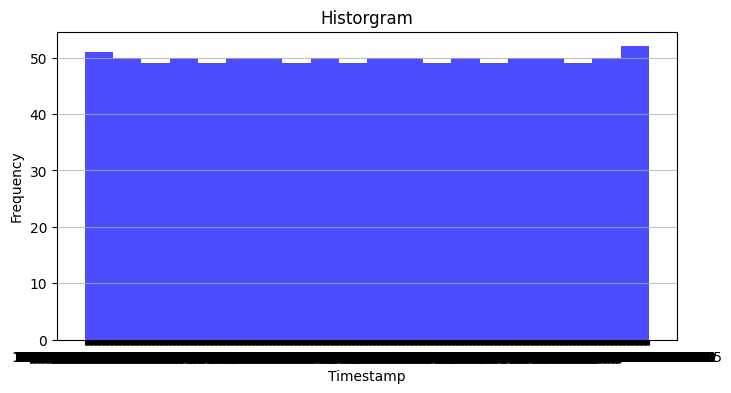

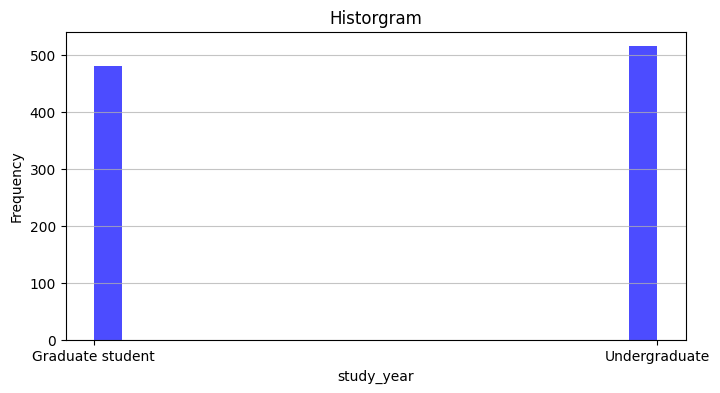

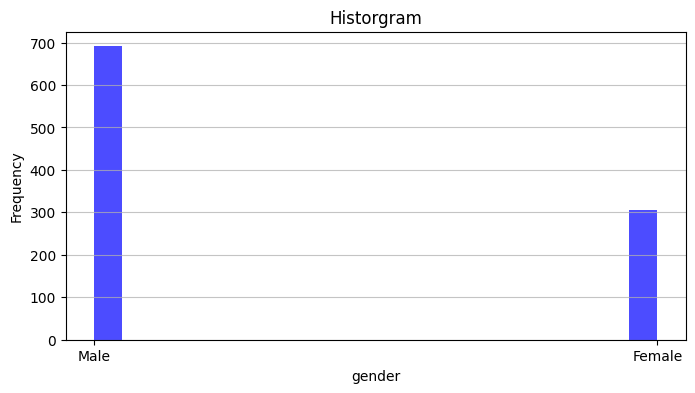

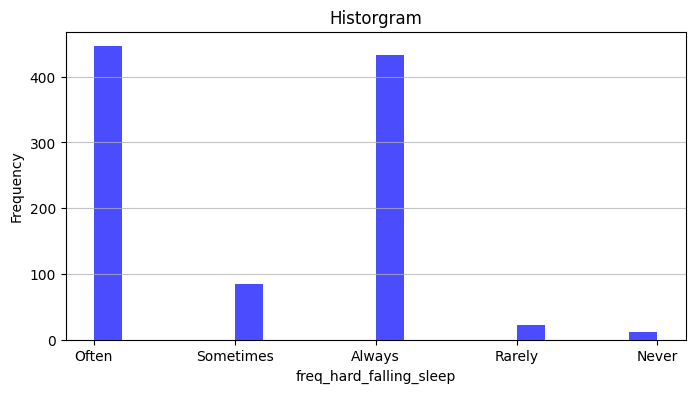

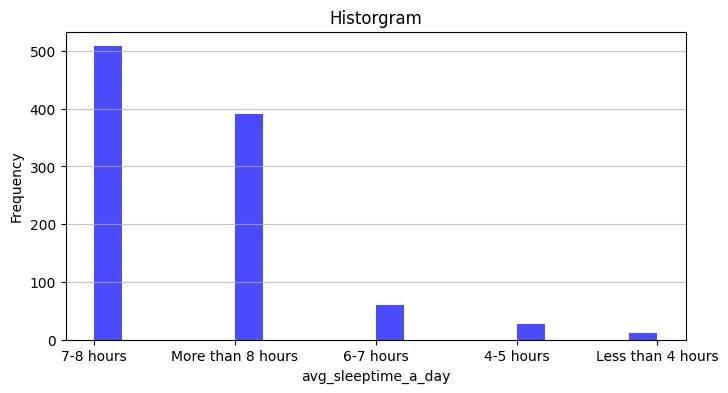

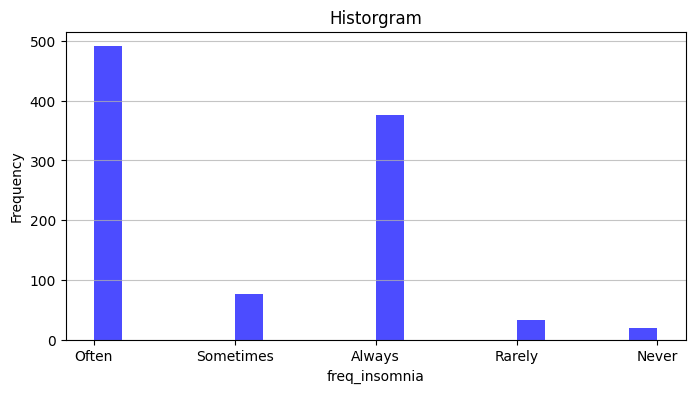

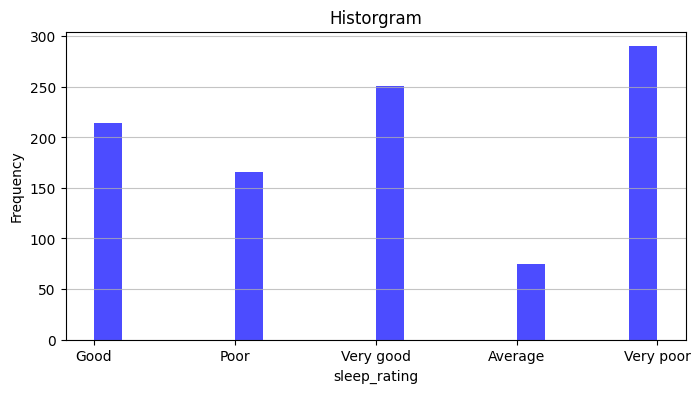

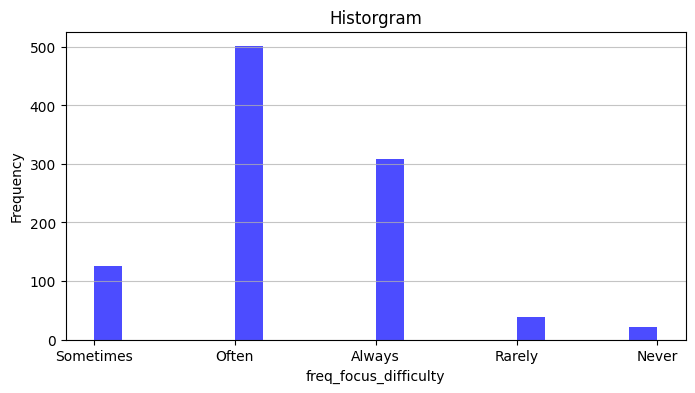

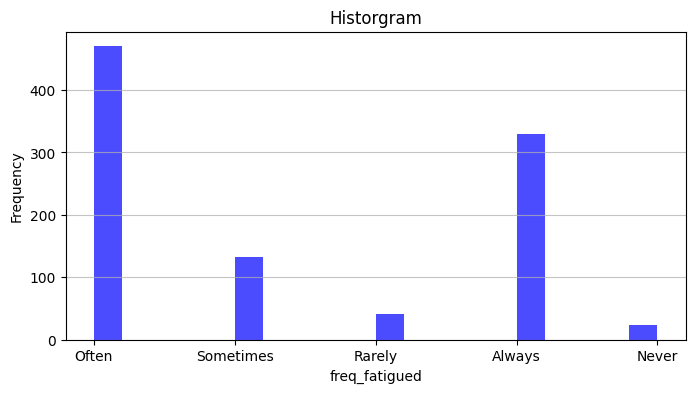

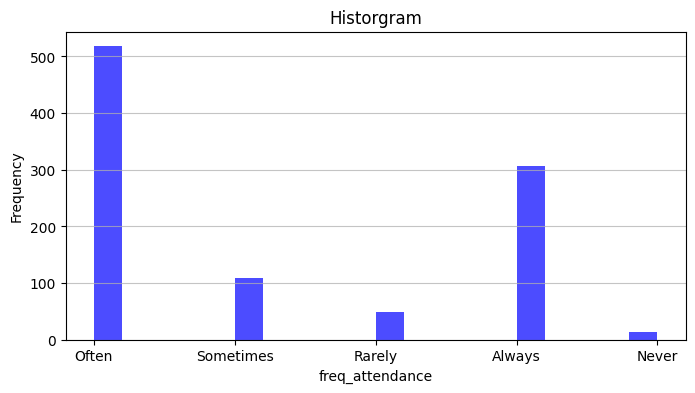

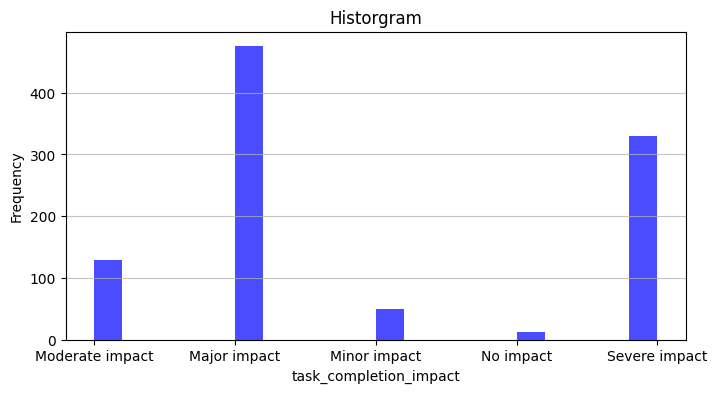

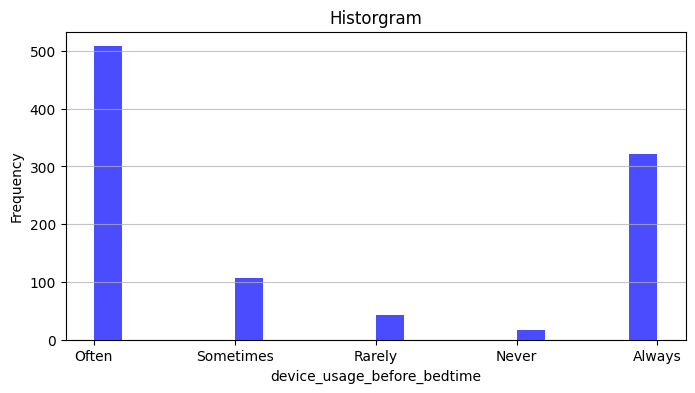

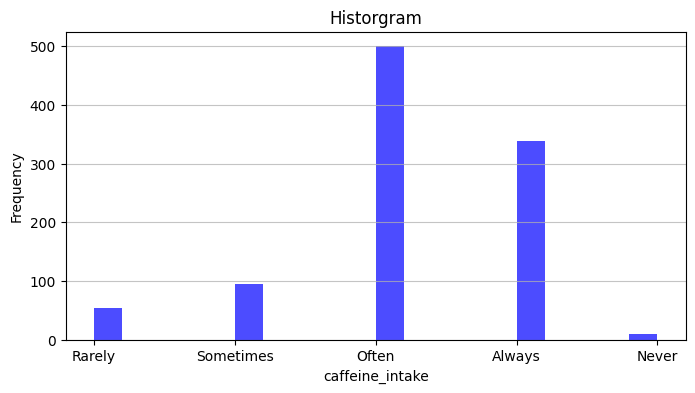

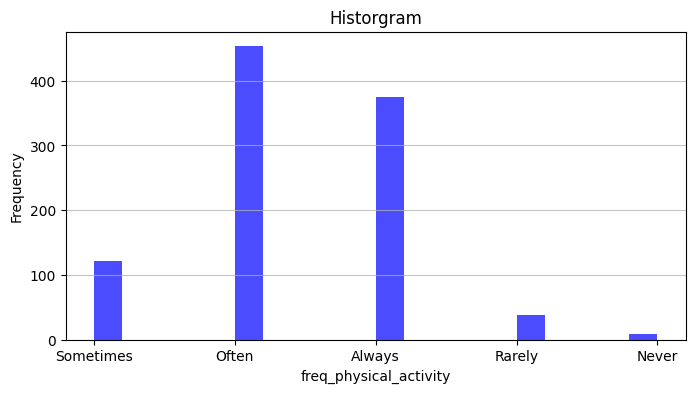

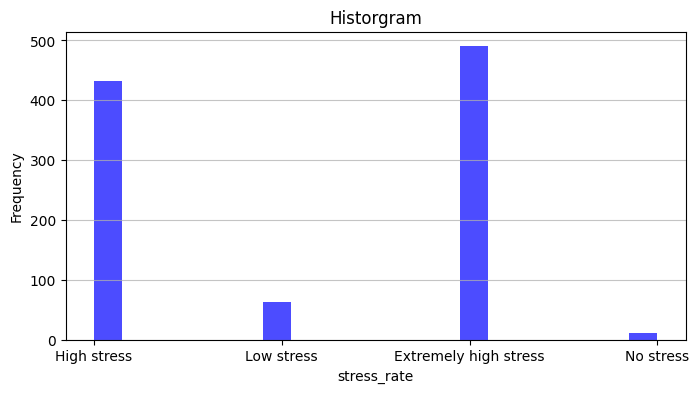

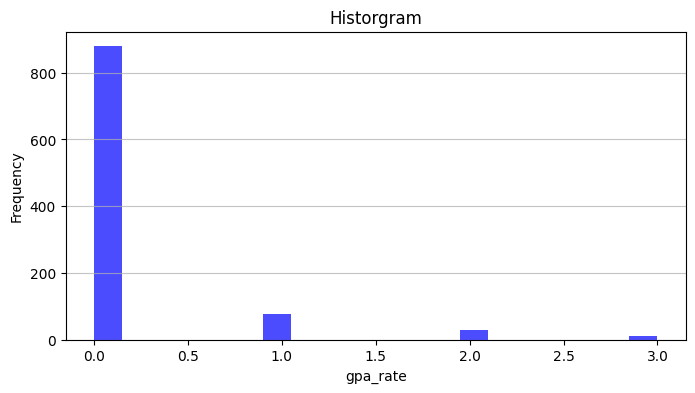

In [9]:
for col in df.columns:
    plt.figure(figsize=(8,4))
    plt.hist(df[col], bins=20, color='blue', alpha=0.7)
    plt.title(f"Historgram")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(axis='y', alpha=0.75)
    plt.show()

In [10]:
"""
Những cột bị imbalanced ở đây là: 
- freq_hard_falling_sleep
- avg_sleeptime_a_day
- freq_insomnia
- freq_focus_difficulty,
- freq_fatigued
- freq_attendance
- task_completion_impact
- device_usage_before_bedtime
- stress_rate
- gpa_rate --- target
""" 
df1 = df # Handle theo hướng SMOTE + Undersampling
df2 = df # Handle t
# df1['gpa_rate'].value_counts
df1.columns
df1['stress_rate'].value_counts()

stress_rate
Extremely high stress    490
High stress              432
Low stress                63
No stress                 11
Name: count, dtype: int64

In [21]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTENC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

    
X = df1.iloc[:, 3: 15]
Y = df1['gpa_rate'] # gpa_rate
freq_order = ['Never', 'Rarely', 'Sometimes', 'Often', 'Always']
correct_categoricals_full = [
    # 2. freq_hard_falling_sleep (Tần suất)
    freq_order,
    # 3. avg_sleeptime_a_day (Thứ tự tăng dần)
    ['Less than 4 hours', '4-5 hours', '6-7 hours', '7-8 hours', 'More than 8 hours'],
    # 4. freq_insomnia (Tần suất)
    freq_order,
    # 5. sleep_rating (Thang đo chất lượng)
    ['Very poor', 'Poor', 'Average', 'Good', 'Very good'],
    # 6. freq_focus_difficulty (Tần suất)
    freq_order,
    # 7. freq_fatigued (Tần suất)
    freq_order,
    # 8. freq_attendance (Tần suất)
    freq_order,
    # 9. task_completion_impact (Thang đo tác động)
    ['No impact', 'Minor impact', 'Moderate impact', 'Major impact', 'Severe impact'],
    # 10. device_usage_before_bedtime (Tần suất)
    freq_order,
    # 11. caffeine_intake (Tần suất)
    freq_order,
    # 12. freq_physical_activity (Tần suất)
    freq_order,

    ['No stress', 'Low stress','High stress', 'Extremely high stress']
]
encoder = OrdinalEncoder(categories=correct_categoricals_full)
lencoder = LabelEncoder()
X_encoded = encoder.fit_transform(X)
X_encoded = np.hstack([X_encoded, np.random.rand(len(X_encoded), 1)])  # thêm 1 cột giả numeric
cate_features = list(range(X.shape[1]))  
Y_encoded = lencoder.fit_transform(Y)
# lencoder.inverse_transform([0,1,2,3])
cate_features

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

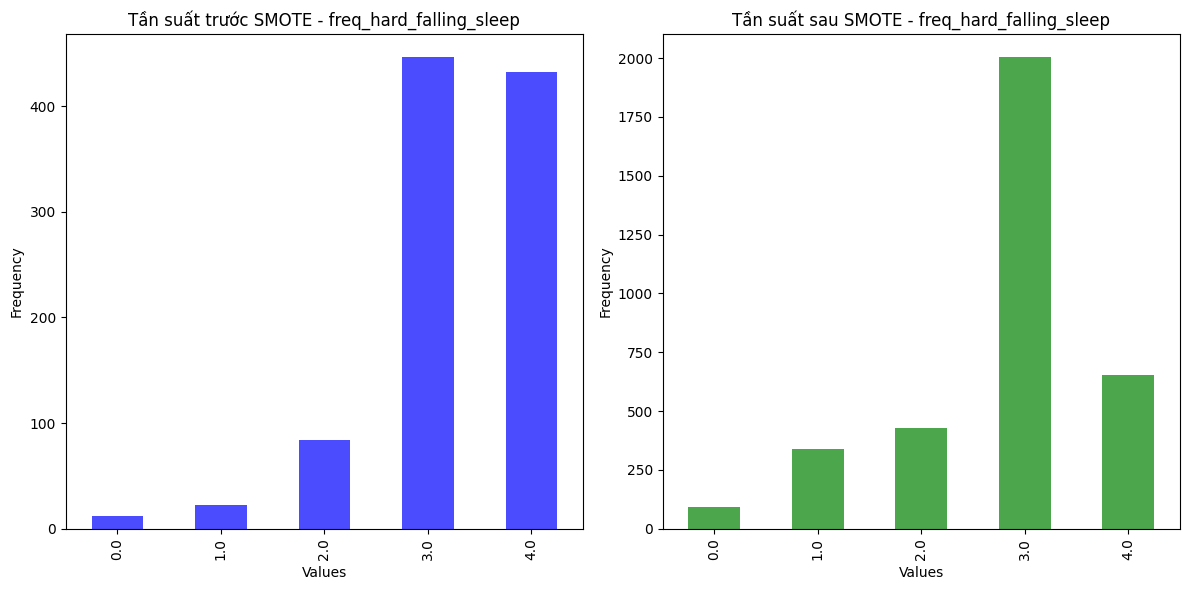

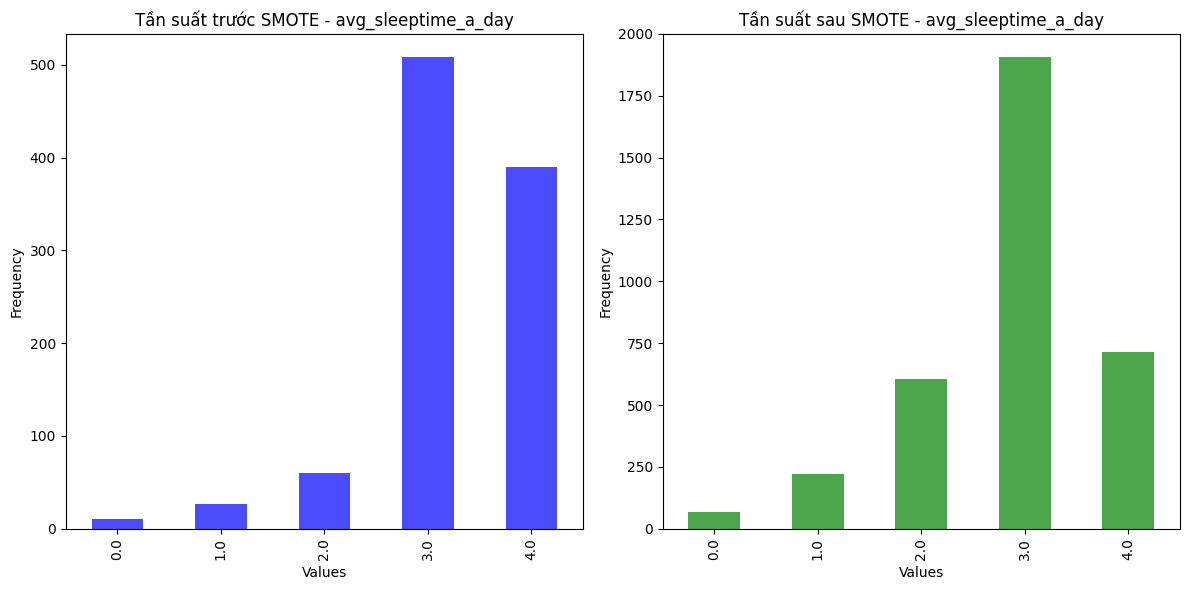

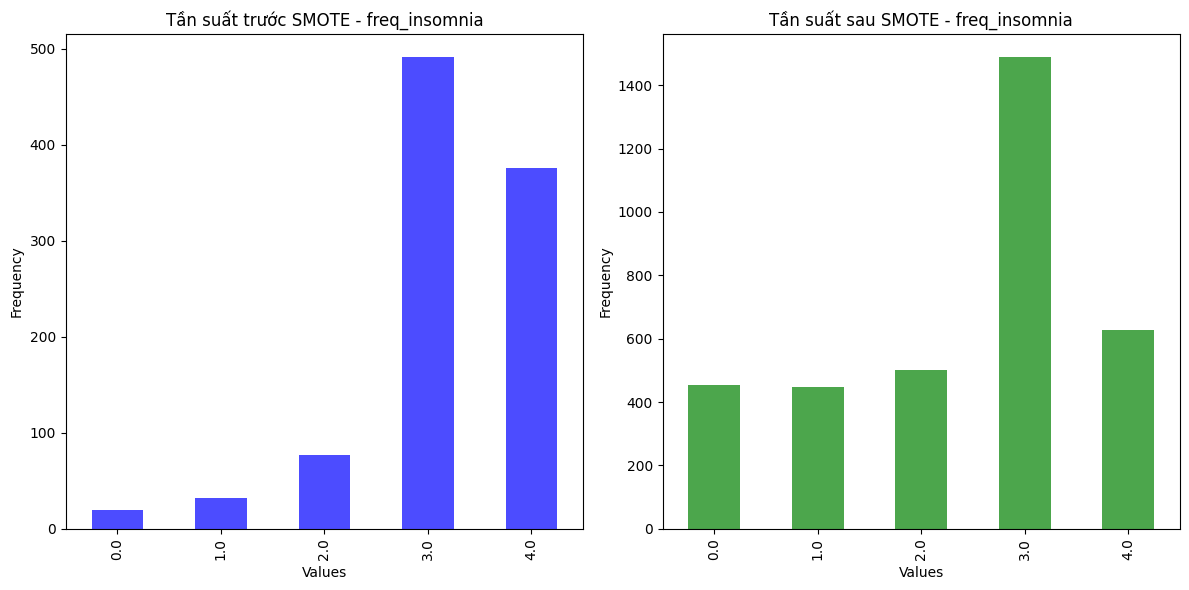

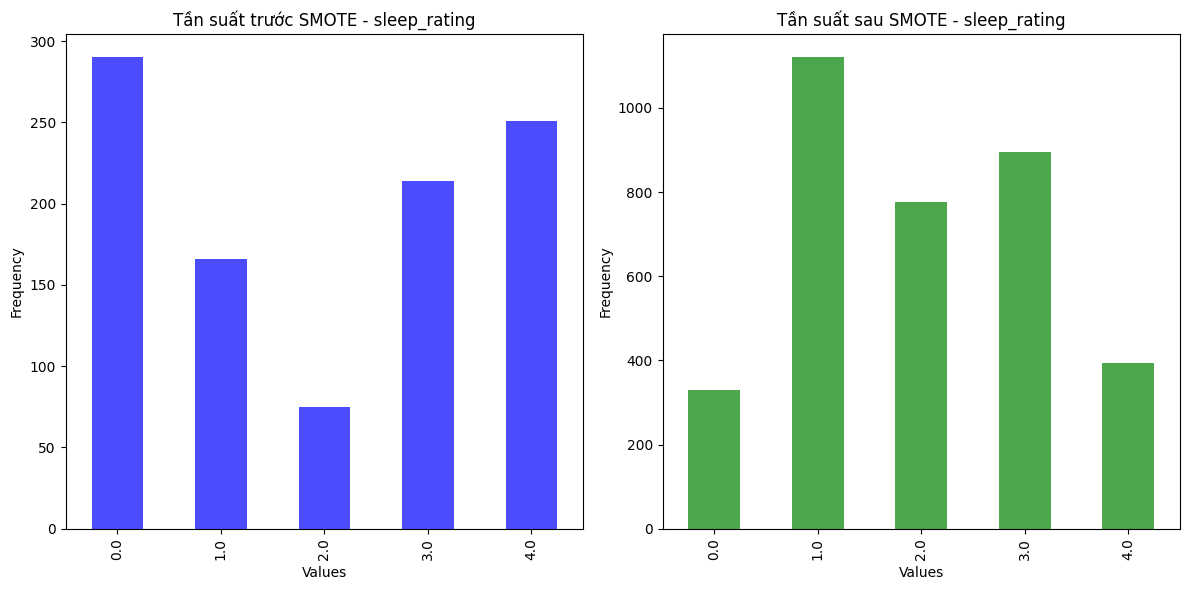

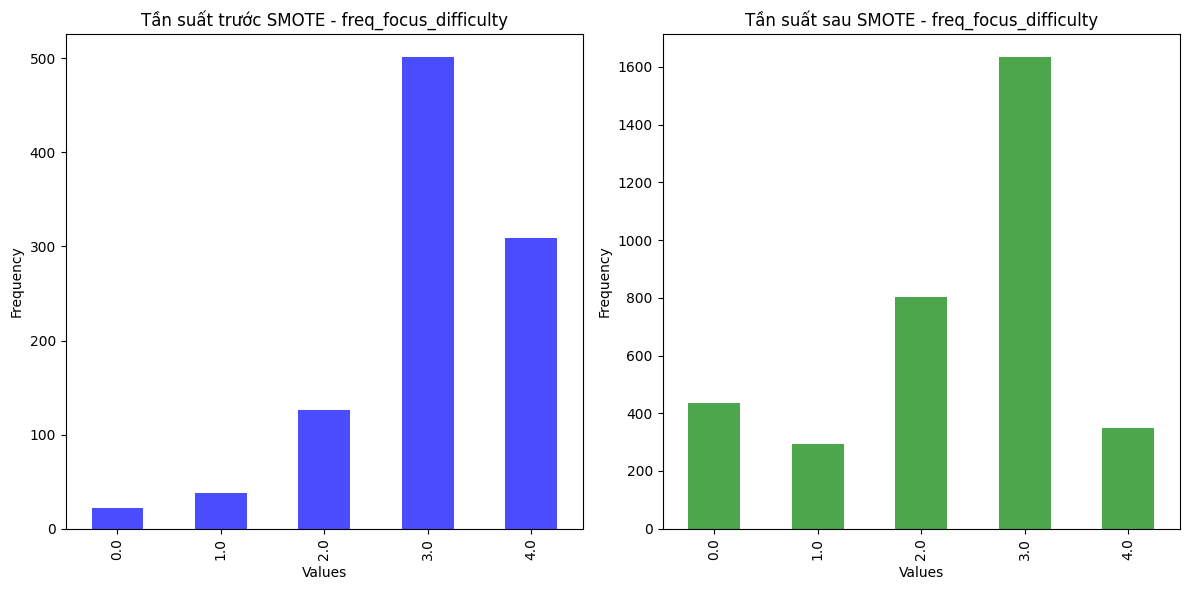

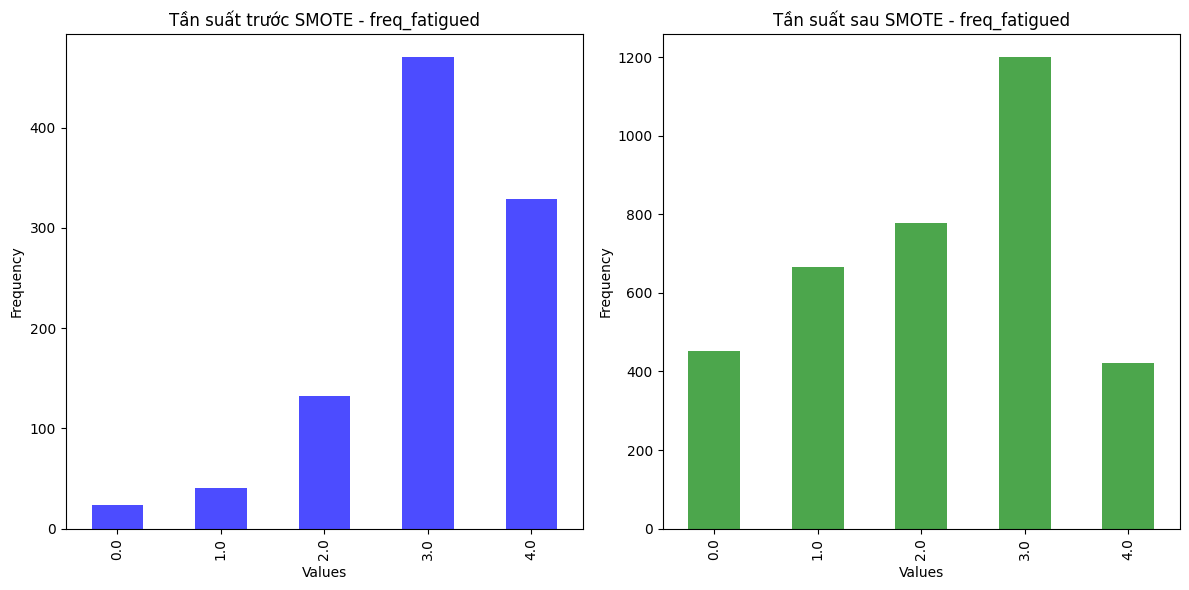

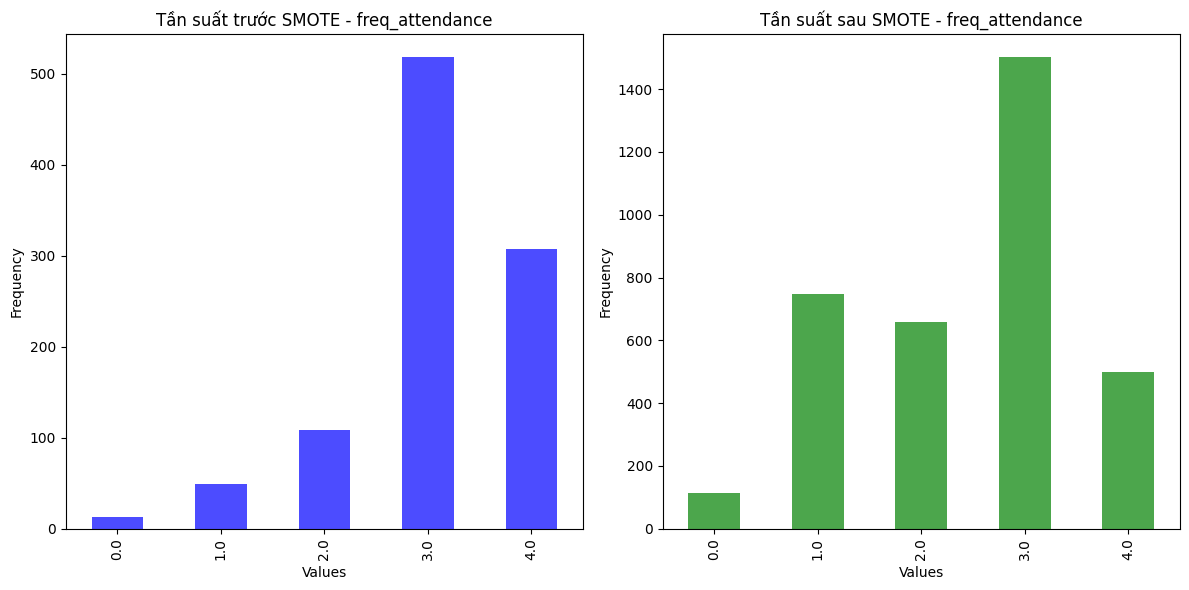

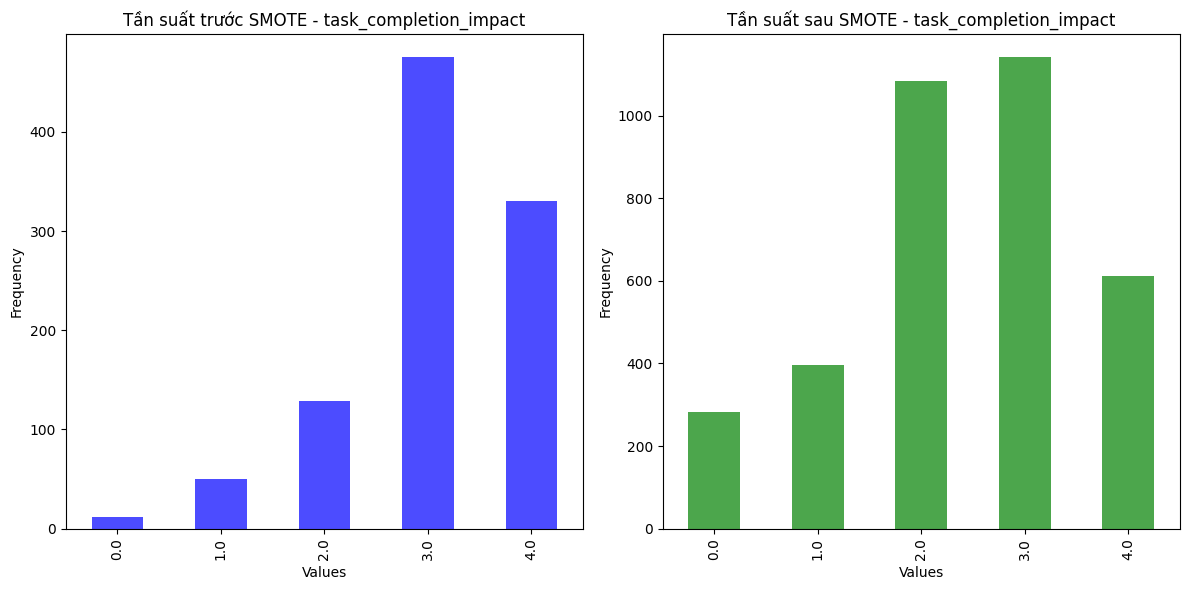

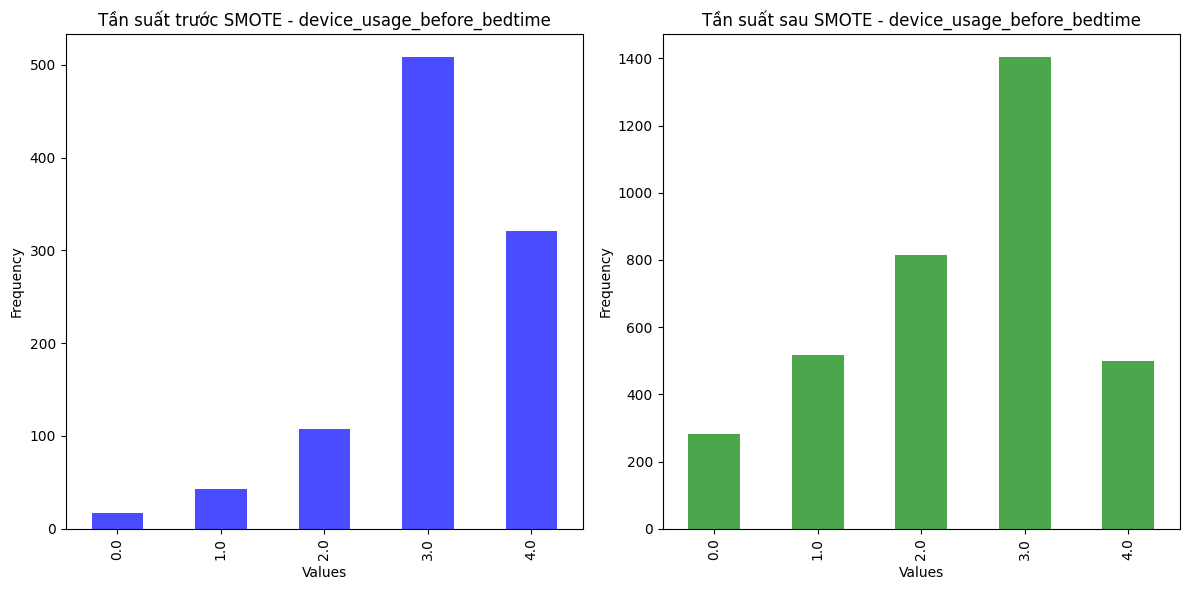

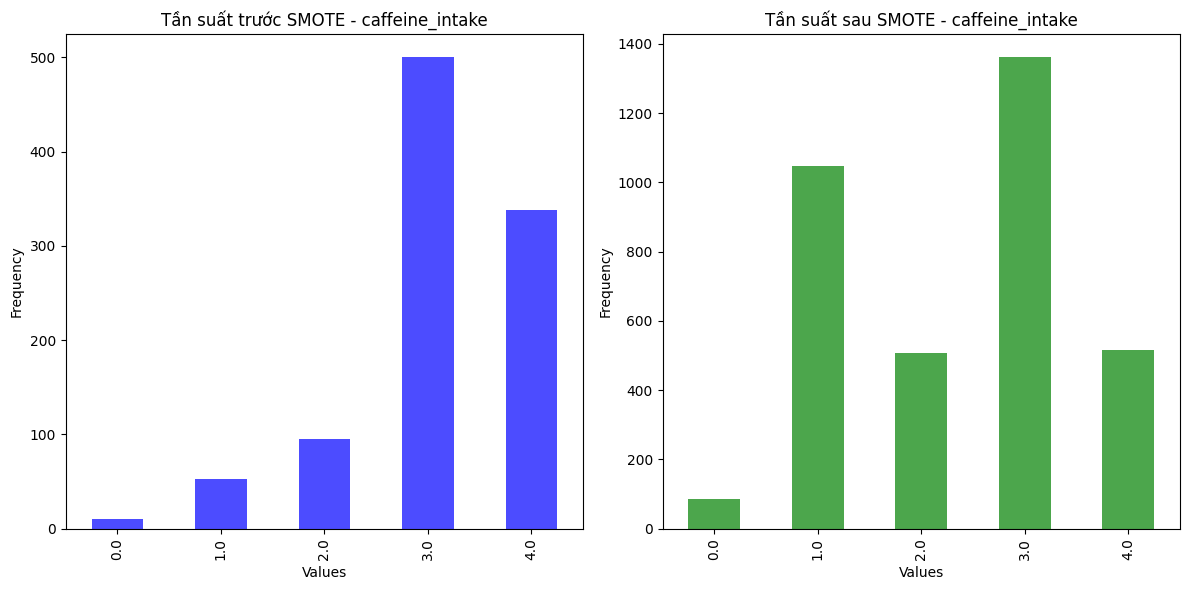

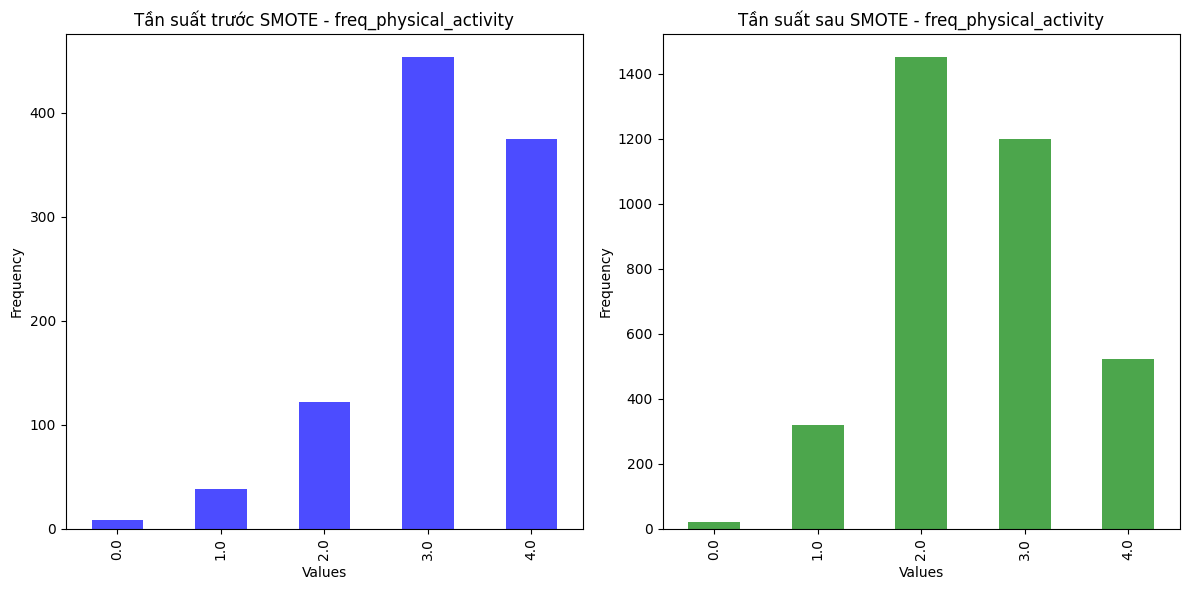

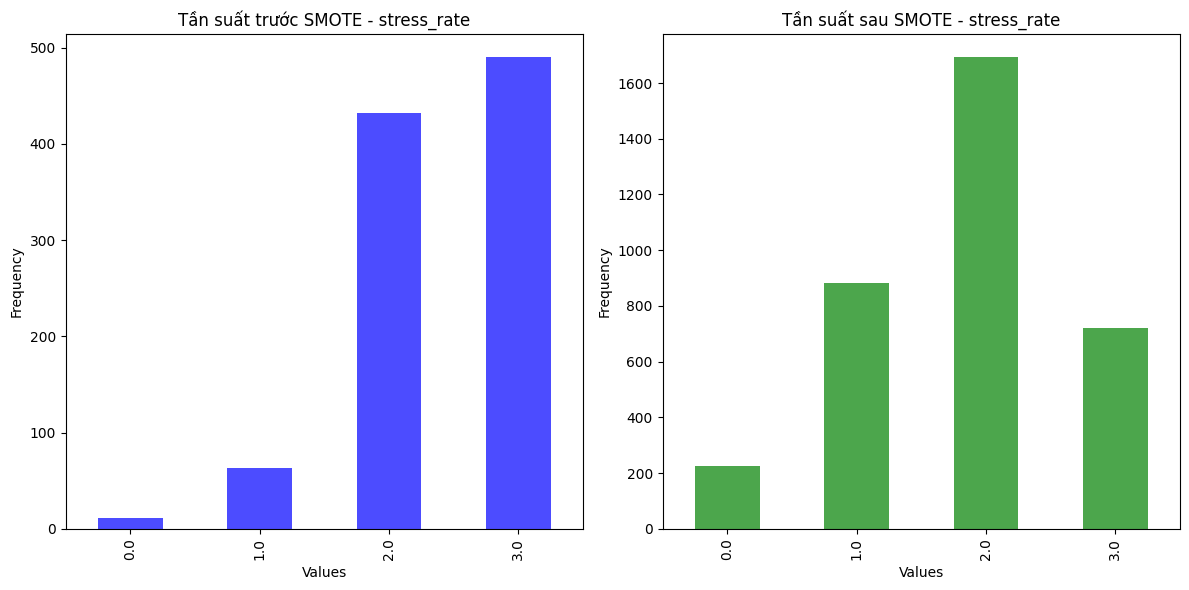

In [22]:
smote_nc = SMOTENC(categorical_features=cate_features, random_state=42)
X_res, Y_res = smote_nc.fit_resample(X_encoded, Y_encoded)
for col_idx, col_name in enumerate(X.columns):
    plt.figure(figsize=(12, 6))
    
    # Tần suất trước SMOTE
    plt.subplot(1, 2, 1)
    pd.Series(X_encoded[:, col_idx]).value_counts().sort_index().plot(kind='bar', color='blue', alpha=0.7)
    plt.title(f"Tần suất trước SMOTE - {col_name}")
    plt.xlabel("Values")
    plt.ylabel("Frequency")
    
    # Tần suất sau SMOTE
    plt.subplot(1, 2, 2)
    pd.Series(X_res[:, col_idx]).value_counts().sort_index().plot(kind='bar', color='green', alpha=0.7)
    plt.title(f"Tần suất sau SMOTE - {col_name}")
    plt.xlabel("Values")
    plt.ylabel("Frequency")
    
    plt.tight_layout()
    plt.show()

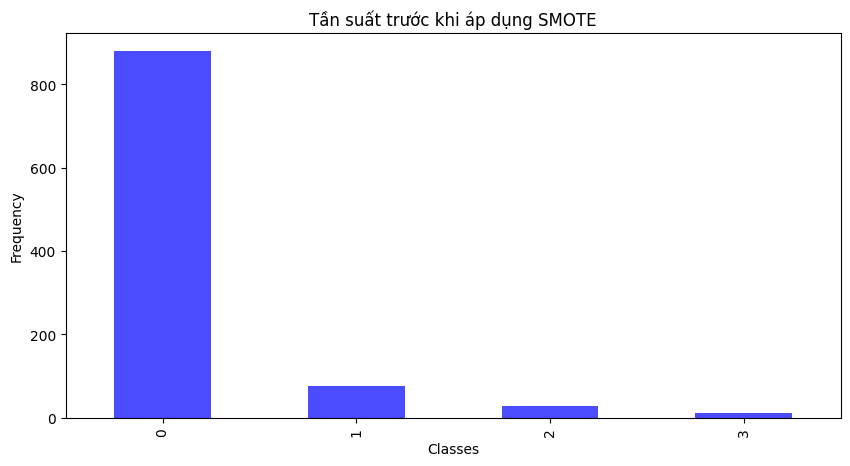

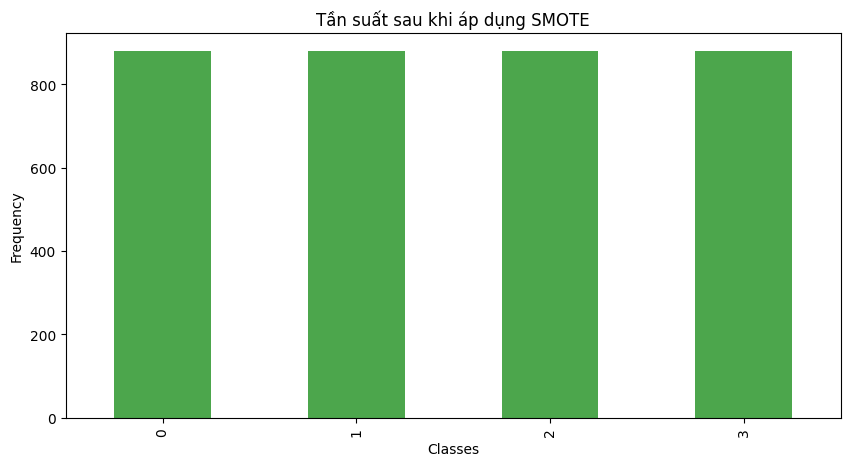

In [13]:
# Tần suất trước SMOTE
plt.figure(figsize=(10, 5))
pd.Series(Y_encoded).value_counts().sort_index().plot(kind='bar', color='blue', alpha=0.7)
plt.title("Tần suất trước khi áp dụng SMOTE")
plt.xlabel("Classes")
plt.ylabel("Frequency")
plt.show()

# Tần suất sau SMOTE
plt.figure(figsize=(10, 5))
pd.Series(Y_res).value_counts().sort_index().plot(kind='bar', color='green', alpha=0.7)
plt.title("Tần suất sau khi áp dụng SMOTE")
plt.xlabel("Classes")
plt.ylabel("Frequency")
plt.show()


In [14]:

X_train, X_test, y_train, y_test = train_test_split(X_res, Y_res, test_size=0.2, random_state=42)
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X_encoded, Y_encoded, test_size=0.2, random_state=42)

In [15]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# Huấn luyện mô hình
model_orig = RandomForestClassifier(random_state=42)
model_orig.fit(X_train_orig, y_train_orig)

# Dự đoán
y_pred_orig = model_orig.predict(X_test_orig)

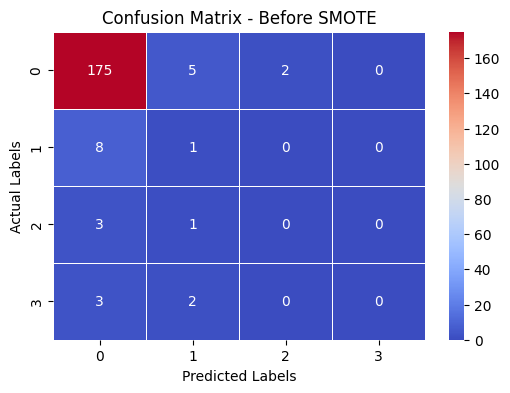

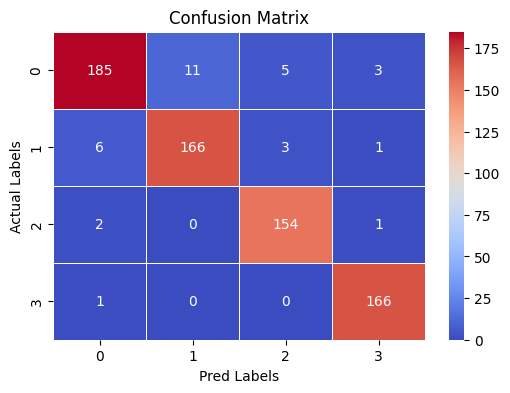

In [16]:
# Vẽ Confusion Matrix trước khi áp dụng SMOTE
conf_matrix_orig = confusion_matrix(y_test_orig, y_pred_orig)
plt.figure(figsize=(6, 4))
sb.heatmap(conf_matrix_orig, annot=True, fmt='d', cmap='coolwarm', linewidths=0.4)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix - Before SMOTE')
plt.show()
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sb.heatmap(conf_matrix, annot=True, fmt='d',cmap='coolwarm',linewidths=0.4)
plt.xlabel('Pred Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

In [32]:
from sklearn.metrics import accuracy_score, f1_score

# Tính độ chính xác (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
# Tính F1-score macro
f1_macro = f1_score(y_test, y_pred, average='macro')
print(f"F1-score (Macro): {f1_macro:.2f}")
# Tính F1-score weighted
f1_weighted = f1_score(y_test, y_pred, average='weighted')
print(f"F1-score (Weighted): {f1_weighted:.2f}")

Accuracy: 0.64
F1-score (Macro): 0.60
F1-score (Weighted): 0.65


In [33]:
# plt.figure(figsize=(8,6))
# sb.heatmap(df1, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
# plt.title("Heatmap of DataFrame")
# plt.show()


# annot = True => Hiển giá trị trong từng ô
# fmt = ".2f" => Định dạng số ( 2 chữ số thập phân)
# cmap = "coolwarm" => Chọn bảng màu
# linewidths=0.5 => Thêm đường viền giữa các ô

In [34]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd

# Tăng tỷ lệ SMOTE ban đầu
smote = SMOTE(sampling_strategy={2: len(Y_encoded[Y_encoded == 2]) * 2, 
                                 3: len(Y_encoded[Y_encoded == 3]) * 4}, random_state=42)

# Áp dụng SMOTE
X_resampled, Y_resampled = smote.fit_resample(X_encoded, Y_encoded)

# Kiểm tra số lượng mẫu sau SMOTE
print("Số lượng mẫu sau SMOTE:")
print(pd.Series(Y_resampled).value_counts())

# Lấy ngẫu nhiên 5 mẫu từ lớp 3 từ Y_encoded (Original Sample)
class_3_indices_original = np.where(Y_encoded == 3)[0]
random_5_indices_original = np.random.choice(class_3_indices_original, 5, replace=False)

X_class_3_original = X_encoded[random_5_indices_original]
Y_class_3_original = Y_encoded[random_5_indices_original]
print("Y_class_3: ", Y_class_3_original)
# Lấy 30 mẫu ngẫu nhiên từ lớp 3 trong tập SMOTE
class_3_indices_resampled = np.where(Y_resampled == 3)[0]
random_30_indices_resampled = np.random.choice(class_3_indices_resampled, 30, replace=False)

X_class_3_resampled = X_resampled[random_30_indices_resampled]
Y_class_3_resampled = Y_resampled[random_30_indices_resampled]

# Kết hợp lại 5 mẫu từ Y_encoded gốc và 30 mẫu từ SMOTE
X_class_3_final = np.vstack([X_class_3_original, X_class_3_resampled])
Y_class_3_final = np.hstack([Y_class_3_original, Y_class_3_resampled])

# Tạo tập con nhỏ 35 mẫu cân bằng
X_balanced = np.vstack([X_resampled[Y_resampled == 0][:35], 
                        X_resampled[Y_resampled == 1][:35], 
                        X_resampled[Y_resampled == 2][:35], 
                        X_class_3_final])
Y_balanced = np.hstack([Y_resampled[Y_resampled == 0][:35], 
                        Y_resampled[Y_resampled == 1][:35], 
                        Y_resampled[Y_resampled == 2][:35], 
                        Y_class_3_final])

# Kiểm tra số lượng mẫu trong tập con
print("Số lượng mẫu trong tập con:")
print(pd.Series(Y_balanced).value_counts())

# Chia dữ liệu thành train-test
X_train, X_test, y_train, y_test = train_test_split(X_balanced, Y_balanced, test_size=0.2, random_state=42)

# Huấn luyện mô hình
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Dự đoán và đánh giá
y_pred = model.predict(X_test)
print("Báo cáo phân loại:")
print(classification_report(y_test, y_pred))

Số lượng mẫu sau SMOTE:
0    879
1     76
2     58
3     48
Name: count, dtype: int64
Y_class_3:  [3 3 3 3 3]
Số lượng mẫu trong tập con:
0    35
1    35
2    35
3    35
Name: count, dtype: int64
Báo cáo phân loại:
              precision    recall  f1-score   support

           0       0.38      0.43      0.40         7
           1       0.29      0.29      0.29         7
           2       0.14      0.25      0.18         4
           3       0.83      0.50      0.62        10

    accuracy                           0.39        28
   macro avg       0.41      0.37      0.37        28
weighted avg       0.48      0.39      0.42        28



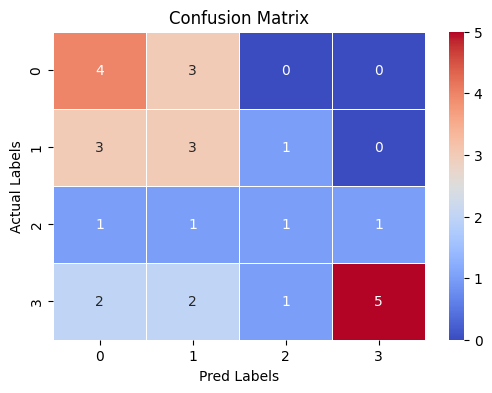

In [29]:
conf = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sb.heatmap(conf, annot=True, fmt='d',cmap='coolwarm',linewidths=0.4)
plt.xlabel('Pred Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

In [44]:
df3 = df.drop(columns=['Timestamp'])

# PHÂN TÍCH TOÀN DIỆN DATASET - SLEEP TO PERFORMANCE

## Mục tiêu:
- **Biến target**: `gpa_rating` - Đánh giá hiệu suất học tập của sinh viên
- **Mục đích**: Phân tích mối quan hệ giữa chất lượng giấc ngủ và hiệu suất học tập

## Quy trình phân tích:
1. **EDA (Exploratory Data Analysis)** - Khám phá dữ liệu
2. **Data Preprocessing** - Tiền xử lý dữ liệu
3. **Feature Engineering** - Tạo và chọn đặc trưng
4. **Modeling** - Xây dựng mô hình
5. **Evaluation** - Đánh giá mô hình
6. **Visualization** - Trực quan hóa kết quả

## BƯỚC 1: LOAD VÀ KHÁM PHÁ DỮ LIỆU BAN ĐẦU

In [45]:
# Import thư viện cần thiết
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, 
                             f1_score, precision_score, recall_score, roc_auc_score)
from imblearn.over_sampling import SMOTE, SMOTENC
warnings.filterwarnings('ignore')

# Cấu hình hiển thị
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)

print("=" * 80)
print("PHÂN TÍCH DỮ LIỆU: SLEEP QUALITY vs STUDENT PERFORMANCE")
print("=" * 80)

PHÂN TÍCH DỮ LIỆU: SLEEP QUALITY vs STUDENT PERFORMANCE


In [46]:
# Load dữ liệu
df_analysis = pd.read_csv('data_warehouse/sleep_to_performance.csv')

print("\n📊 THÔNG TIN CƠ BẢN VỀ DATASET")
print("-" * 80)
print(f"✓ Số lượng mẫu (rows): {df_analysis.shape[0]}")
print(f"✓ Số lượng đặc trưng (columns): {df_analysis.shape[1]}")
print(f"✓ Kích thước bộ nhớ: {df_analysis.memory_usage(deep=True).sum() / 1024:.2f} KB")

print("\n📋 5 DÒNG ĐẦU TIÊN:")
print("-" * 80)
df_analysis.head()


📊 THÔNG TIN CƠ BẢN VỀ DATASET
--------------------------------------------------------------------------------
✓ Số lượng mẫu (rows): 996
✓ Số lượng đặc trưng (columns): 16
✓ Kích thước bộ nhớ: 1098.86 KB

📋 5 DÒNG ĐẦU TIÊN:
--------------------------------------------------------------------------------


,Timestamp,1. What is your year of study?,2. What is your gender?,3. How often do you have difficulty falling asleep at night?,"4. On average, how many hours of sleep do you get on a typical day?",5. How often do you wake up during the night and have trouble falling back asleep?,6. How would you rate the overall quality of your sleep?,7. How often do you experience difficulty concentrating during lectures or studying due to lack of sleep?,"8. How often do you feel fatigued during the day, affecting your ability to study or attend classes?","9. How often do you miss or skip classes due to sleep-related issues (e.g., insomnia, feeling tired)?",10. How would you describe the impact of insufficient sleep on your ability to complete assignments and meet deadlines?,"11. How often do you use electronic devices (e.g., phone, computer) before going to sleep?","12. How often do you consume caffeine (coffee, energy drinks) to stay awake or alert?",13. How often do you engage in physical activity or exercise?,14. How would you describe your stress levels related to academic workload?,15. How would you rate your overall academic performance (GPA or grades) in the past semester?
0,10/24/2024 16:51:15,Graduate student,Male,Often (5-6 times a week),7-8 hours,Often (5-6 times a week),Good,Sometimes,Often,Often (3-4 times a week),Moderate impact,Often (5-6 times a week),Rarely (1-2 times a week),Sometimes (3-4 times a week),High stress,Average
1,10/24/2024 16:51:51,Third year,Male,Often (5-6 times a week),7-8 hours,Often (5-6 times a week),Good,Often,Sometimes,Sometimes (1-2 times a week),Major impact,Sometimes (3-4 times a week),Sometimes (3-4 times a week),Sometimes (3-4 times a week),Low stress,Good
2,10/24/2024 16:52:21,First year,Female,Sometimes (3-4 times a week),7-8 hours,Sometimes (3-4 times a week),Good,Often,Often,Sometimes (1-2 times a week),Major impact,Often (5-6 times a week),Often (5-6 times a week),Often (5-6 times a week),High stress,Below Average
3,10/24/2024 16:53:00,Third year,Male,Often (5-6 times a week),More than 8 hours,Sometimes (3-4 times a week),Poor,Often,Often,Rarely (1-2 times a month),Minor impact,Sometimes (3-4 times a week),Sometimes (3-4 times a week),Every day,Extremely high stress,Excellent
4,10/24/2024 16:53:25,Graduate student,Male,Often (5-6 times a week),7-8 hours,Often (5-6 times a week),Very good,Always,Sometimes,Sometimes (1-2 times a week),Moderate impact,Sometimes (3-4 times a week),Sometimes (3-4 times a week),Often (5-6 times a week),Low stress,Average


In [47]:
# Kiểm tra thông tin chi tiết
print("\n🔍 THÔNG TIN CÁC CỘT:")
print("-" * 80)
print(df_analysis.info())

print("\n📊 THỐNG KÊ MÔ TẢ:")
print("-" * 80)
df_analysis.describe(include='all')


🔍 THÔNG TIN CÁC CỘT:
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 16 columns):
 #   Column                                                                                                                   Non-Null Count  Dtype 
---  ------                                                                                                                   --------------  ----- 
 0   Timestamp                                                                                                                996 non-null    object
 1   1. What is your year of study?                                                                                           996 non-null    object
 2   2. What is your gender?                                                                                                  996 non-null    object
 3   3. How often do you have difficulty fallin

,Timestamp,1. What is your year of study?,2. What is your gender?,3. How often do you have difficulty falling asleep at night?,"4. On average, how many hours of sleep do you get on a typical day?",5. How often do you wake up during the night and have trouble falling back asleep?,6. How would you rate the overall quality of your sleep?,7. How often do you experience difficulty concentrating during lectures or studying due to lack of sleep?,"8. How often do you feel fatigued during the day, affecting your ability to study or attend classes?","9. How often do you miss or skip classes due to sleep-related issues (e.g., insomnia, feeling tired)?",10. How would you describe the impact of insufficient sleep on your ability to complete assignments and meet deadlines?,"11. How often do you use electronic devices (e.g., phone, computer) before going to sleep?","12. How often do you consume caffeine (coffee, energy drinks) to stay awake or alert?",13. How often do you engage in physical activity or exercise?,14. How would you describe your stress levels related to academic workload?,15. How would you rate your overall academic performance (GPA or grades) in the past semester?
count,996,996,996,996,996,996,996,996,996,996,996,996,996,996,996,996
unique,993,4,2,5,5,5,5,5,5,5,5,5,5,5,4,5
top,10/24/2024 17:04:15,Graduate student,Male,Often (5-6 times a week),7-8 hours,Often (5-6 times a week),Very poor,Often,Often,Often (3-4 times a week),Major impact,Often (5-6 times a week),Often (5-6 times a week),Often (5-6 times a week),Extremely high stress,Poor
freq,2,481,691,446,508,491,290,501,470,518,475,508,500,453,490,491


In [48]:
# Kiểm tra giá trị thiếu
print("\n⚠️ KIỂM TRA GIÁ TRỊ THIẾU (Missing Values):")
print("-" * 80)
missing_data = pd.DataFrame({
    'Column': df_analysis.columns,
    'Missing Count': df_analysis.isna().sum(),
    'Missing %': (df_analysis.isna().sum() / len(df_analysis) * 100).round(2)
})
missing_data = missing_data[missing_data['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

if len(missing_data) > 0:
    print(missing_data)
else:
    print("✓ Không có giá trị thiếu trong dataset!")

# Kiểm tra duplicate
duplicates = df_analysis.duplicated().sum()
print(f"\n🔄 Số dòng trùng lặp: {duplicates}")
if duplicates > 0:
    print(f"   → Chiếm {duplicates/len(df_analysis)*100:.2f}% tổng số dòng")


⚠️ KIỂM TRA GIÁ TRỊ THIẾU (Missing Values):
--------------------------------------------------------------------------------
✓ Không có giá trị thiếu trong dataset!

🔄 Số dòng trùng lặp: 0


## BƯỚC 2: DATA PREPROCESSING - TIỀN XỬ LÝ DỮ LIỆU

In [49]:
# Tạo bản sao để xử lý
df_clean = df_analysis.copy()

print("\n🔧 BƯỚC 2.1: ĐỔI TÊN CỘT")
print("-" * 80)

# Đổi tên cột cho dễ hiểu và dễ làm việc
column_mapping = {
    '1. What is your year of study?': 'study_year',
    '2. What is your gender?': 'gender',
    '3. How often do you have difficulty falling asleep at night? ': 'freq_hard_falling_sleep',
    '4. On average, how many hours of sleep do you get on a typical day?': 'avg_sleeptime_a_day',
    '5. How often do you wake up during the night and have trouble falling back asleep?': 'freq_insomnia',
    '6. How would you rate the overall quality of your sleep?': 'sleep_rating',
    '7. How often do you experience difficulty concentrating during lectures or studying due to lack of sleep?': 'freq_focus_difficulty',
    '8. How often do you feel fatigued during the day, affecting your ability to study or attend classes?': 'freq_fatigued',
    '9. How often do you miss or skip classes due to sleep-related issues (e.g., insomnia, feeling tired)?': 'freq_attendance',
    '10. How would you describe the impact of insufficient sleep on your ability to complete assignments and meet deadlines?': 'task_completion_impact',
    '11. How often do you use electronic devices (e.g., phone, computer) before going to sleep?': 'device_usage_before_bedtime',
    '12. How often do you consume caffeine (coffee, energy drinks) to stay awake or alert?': 'caffeine_intake',
    '13. How often do you engage in physical activity or exercise?': 'freq_physical_activity',
    '14. How would you describe your stress levels related to academic workload?': 'stress_rate',
    '15. How would you rate your overall academic performance (GPA or grades) in the past semester?': 'gpa_rate'
}

df_clean.rename(columns=column_mapping, inplace=True)
print(f"✓ Đã đổi tên {len(column_mapping)} cột")
print("\nTên cột mới:")
for i, col in enumerate(df_clean.columns, 1):
    print(f"  {i:2d}. {col}")


🔧 BƯỚC 2.1: ĐỔI TÊN CỘT
--------------------------------------------------------------------------------
✓ Đã đổi tên 15 cột

Tên cột mới:
   1. Timestamp
   2. study_year
   3. gender
   4. freq_hard_falling_sleep
   5. avg_sleeptime_a_day
   6. freq_insomnia
   7. sleep_rating
   8. freq_focus_difficulty
   9. freq_fatigued
  10. freq_attendance
  11. task_completion_impact
  12. device_usage_before_bedtime
  13. caffeine_intake
  14. freq_physical_activity
  15. stress_rate
  16. gpa_rate


In [50]:
print("\n🔧 BƯỚC 2.2: XỬ LÝ CỘT TIMESTAMP VÀ DUPLICATE")
print("-" * 80)

# Xóa cột Timestamp nếu tồn tại
if 'Timestamp' in df_clean.columns:
    df_clean.drop(columns=['Timestamp'], inplace=True)
    print("✓ Đã xóa cột 'Timestamp'")
    
# Xóa duplicate nếu có
duplicates_before = df_clean.duplicated().sum()
if duplicates_before > 0:
    df_clean.drop_duplicates(inplace=True)
    print(f"✓ Đã xóa {duplicates_before} dòng trùng lặp")
else:
    print("✓ Không có dòng trùng lặp")

print(f"\nKích thước dataset sau xử lý: {df_clean.shape}")


🔧 BƯỚC 2.2: XỬ LÝ CỘT TIMESTAMP VÀ DUPLICATE
--------------------------------------------------------------------------------
✓ Đã xóa cột 'Timestamp'
✓ Đã xóa 18 dòng trùng lặp

Kích thước dataset sau xử lý: (978, 15)


In [51]:
print("\n🔧 BƯỚC 2.3: CHUẨN HÓA GIÁ TRỊ PHÂN LOẠI")
print("-" * 80)

# Chuẩn hóa study_year
print("\n1️⃣ Study Year (Năm học):")
print(f"   Trước: {df_clean['study_year'].unique()}")
df_clean['study_year'] = df_clean['study_year'].replace({
    'First year': 'Undergraduate',
    'Second year': 'Undergraduate',
    'Third year': 'Undergraduate',
    'Graduate Student': 'Graduate'
})
print(f"   Sau:  {df_clean['study_year'].unique()}")
print(f"   Phân bố: {df_clean['study_year'].value_counts().to_dict()}")

# Chuẩn hóa tần suất
print("\n2️⃣ Frequency Columns (Các cột tần suất):")
frequency_columns = [
    'freq_hard_falling_sleep',
    'freq_insomnia',
    'freq_focus_difficulty',
    'freq_fatigued',
    'device_usage_before_bedtime',
    'caffeine_intake',
    'freq_physical_activity',
    'freq_attendance'
]

frequency_mapping = {
    'Never': 'Never',
    'Rarely (1-2 times a month)': 'Rarely',
    'Rarely (1-2 times a week)': 'Rarely',
    'Sometimes (1-2 times a week)': 'Sometimes',
    'Sometimes (3-4 times a week)': 'Sometimes',
    'Often (3-4 times a week)': 'Often',
    'Often (5-6 times a week)': 'Often',
    'Every day': 'Always',
    'Every night': 'Always',
    'Always': 'Always'
}

for col in frequency_columns:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].replace(frequency_mapping)
        
print(f"   ✓ Đã chuẩn hóa {len(frequency_columns)} cột tần suất")
print(f"   Các giá trị: {list(frequency_mapping.values())[:5]}")


🔧 BƯỚC 2.3: CHUẨN HÓA GIÁ TRỊ PHÂN LOẠI
--------------------------------------------------------------------------------

1️⃣ Study Year (Năm học):
   Trước: ['Graduate student' 'Third year' 'First year' 'Second year']
   Sau:  ['Graduate student' 'Undergraduate']
   Phân bố: {'Undergraduate': 508, 'Graduate student': 470}

2️⃣ Frequency Columns (Các cột tần suất):
   ✓ Đã chuẩn hóa 8 cột tần suất
   Các giá trị: ['Never', 'Rarely', 'Rarely', 'Sometimes', 'Sometimes']



🔧 BƯỚC 2.4: PHÂN TÍCH BIẾN TARGET - GPA_RATE
--------------------------------------------------------------------------------

🎯 Phân bố GPA Rate (Trước khi encoding):
gpa_rate
Average           75
Below Average    383
Excellent         12
Good              29
Poor             479
Name: count, dtype: int64


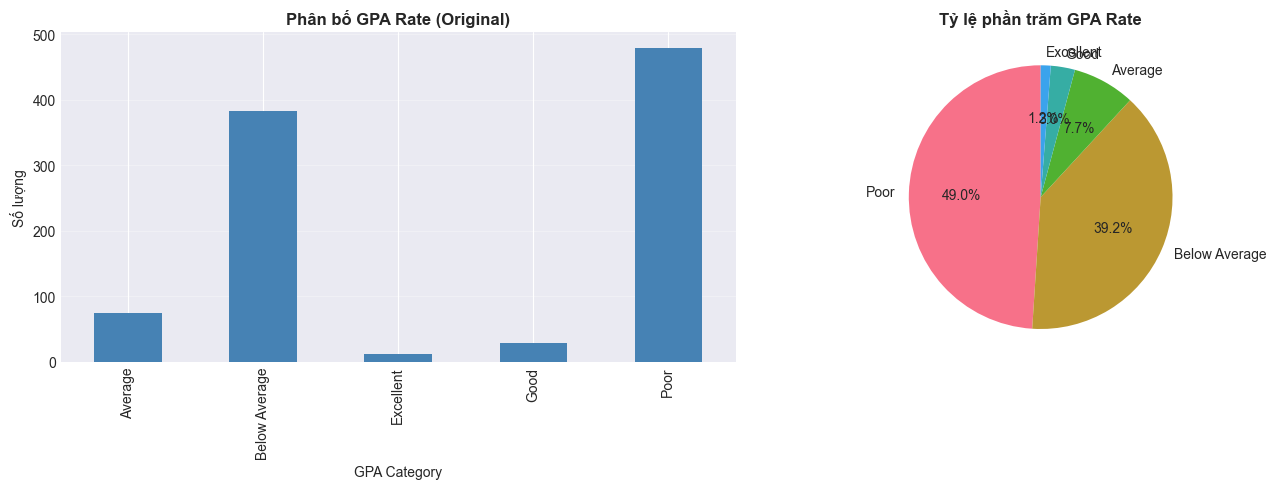


⚠️ ĐÁNH GIÁ SỰ MẤT CÂN BẰNG:
   • Lớp nhiều nhất: 479 mẫu
   • Lớp ít nhất: 12 mẫu
   • Tỷ lệ mất cân bằng: 39.92:1
   → ⚠️ Dataset MẤT CÂN BẰNG NGHIÊM TRỌNG! Cần áp dụng SMOTE


In [52]:
print("\n🔧 BƯỚC 2.4: PHÂN TÍCH BIẾN TARGET - GPA_RATE")
print("-" * 80)

print("\n🎯 Phân bố GPA Rate (Trước khi encoding):")
print(df_clean['gpa_rate'].value_counts().sort_index())

# Visualize phân bố target
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Biểu đồ cột
df_clean['gpa_rate'].value_counts().sort_index().plot(kind='bar', ax=axes[0], color='steelblue')
axes[0].set_title('Phân bố GPA Rate (Original)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('GPA Category')
axes[0].set_ylabel('Số lượng')
axes[0].grid(axis='y', alpha=0.3)

# Biểu đồ tròn
df_clean['gpa_rate'].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%', startangle=90)
axes[1].set_title('Tỷ lệ phần trăm GPA Rate', fontsize=12, fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

print(f"\n⚠️ ĐÁNH GIÁ SỰ MẤT CÂN BẰNG:")
value_counts = df_clean['gpa_rate'].value_counts()
max_class = value_counts.max()
min_class = value_counts.min()
imbalance_ratio = max_class / min_class
print(f"   • Lớp nhiều nhất: {max_class} mẫu")
print(f"   • Lớp ít nhất: {min_class} mẫu")
print(f"   • Tỷ lệ mất cân bằng: {imbalance_ratio:.2f}:1")
if imbalance_ratio > 3:
    print(f"   → ⚠️ Dataset MẤT CÂN BẰNG NGHIÊM TRỌNG! Cần áp dụng SMOTE")

## BƯỚC 3: EXPLORATORY DATA ANALYSIS (EDA) - PHÂN TÍCH KHÁM PHÁ

In [53]:
print("\n📊 BƯỚC 3.1: PHÂN BỐ CÁC ĐẶC TRƯNG")
print("-" * 80)

# Phân tích từng cột
categorical_cols = df_clean.select_dtypes(include=['object']).columns

print(f"\nSố cột phân loại: {len(categorical_cols)}")
print("\nPhân bố chi tiết cho từng cột:\n")

for col in categorical_cols:
    print(f"📌 {col}:")
    value_counts = df_clean[col].value_counts()
    for val, count in value_counts.items():
        pct = count / len(df_clean) * 100
        print(f"   • {val}: {count} ({pct:.1f}%)")
    print()


📊 BƯỚC 3.1: PHÂN BỐ CÁC ĐẶC TRƯNG
--------------------------------------------------------------------------------

Số cột phân loại: 15

Phân bố chi tiết cho từng cột:

📌 study_year:
   • Undergraduate: 508 (51.9%)
   • Graduate student: 470 (48.1%)

📌 gender:
   • Male: 677 (69.2%)
   • Female: 301 (30.8%)

📌 freq_hard_falling_sleep:
   • Often: 439 (44.9%)
   • Always: 421 (43.0%)
   • Sometimes: 84 (8.6%)
   • Rarely: 22 (2.2%)
   • Never: 12 (1.2%)

📌 avg_sleeptime_a_day:
   • 7-8 hours: 501 (51.2%)
   • More than 8 hours: 379 (38.8%)
   • 6-7 hours: 60 (6.1%)
   • 4-5 hours: 27 (2.8%)
   • Less than 4 hours: 11 (1.1%)

📌 freq_insomnia:
   • Often: 484 (49.5%)
   • Always: 365 (37.3%)
   • Sometimes: 77 (7.9%)
   • Rarely: 32 (3.3%)
   • Never: 20 (2.0%)

📌 sleep_rating:
   • Very poor: 281 (28.7%)
   • Very good: 248 (25.4%)
   • Good: 212 (21.7%)
   • Poor: 163 (16.7%)
   • Average: 74 (7.6%)

📌 freq_focus_difficulty:
   • Often: 493 (50.4%)
   • Always: 299 (30.6%)
   • Someti


📊 BƯỚC 3.2: TRỰC QUAN HÓA PHÂN BỐ CÁC ĐẶC TRƯNG QUAN TRỌNG
--------------------------------------------------------------------------------


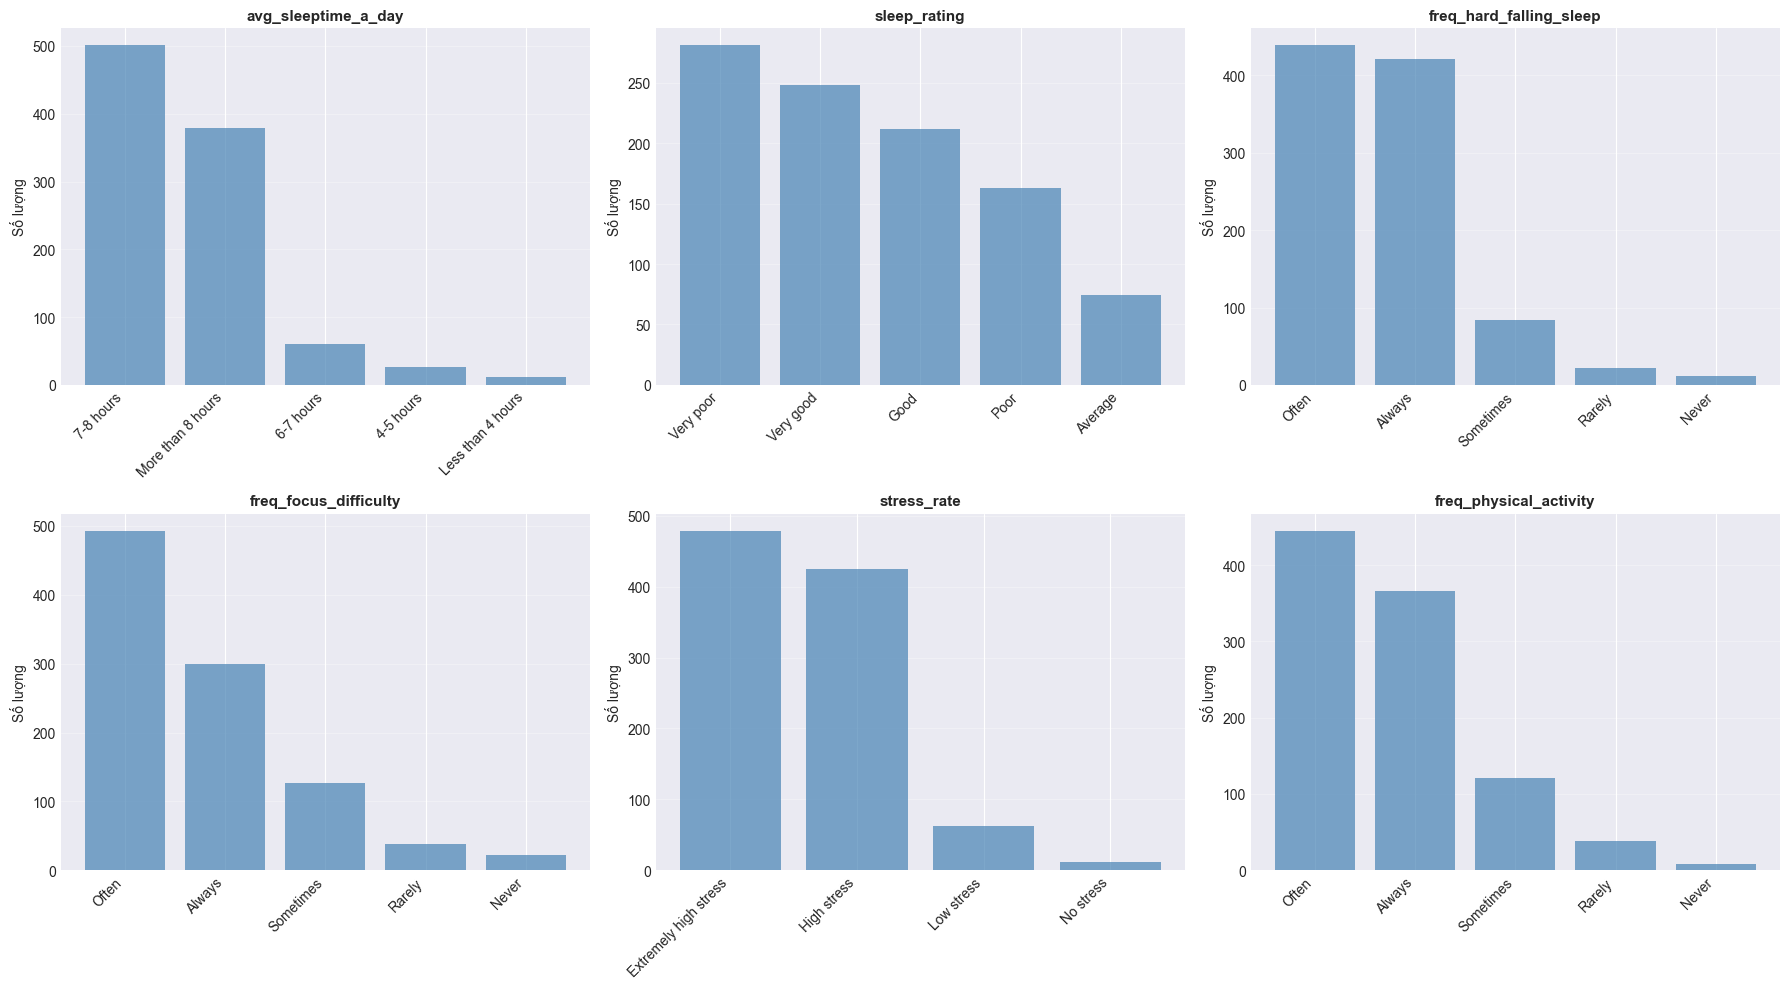

In [54]:
print("\n📊 BƯỚC 3.2: TRỰC QUAN HÓA PHÂN BỐ CÁC ĐẶC TRƯNG QUAN TRỌNG")
print("-" * 80)

# Chọn các cột quan trọng để visualize
important_features = [
    'avg_sleeptime_a_day',
    'sleep_rating', 
    'freq_hard_falling_sleep',
    'freq_focus_difficulty',
    'stress_rate',
    'freq_physical_activity'
]

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, col in enumerate(important_features):
    value_counts = df_clean[col].value_counts()
    axes[idx].bar(range(len(value_counts)), value_counts.values, color='steelblue', alpha=0.7)
    axes[idx].set_xticks(range(len(value_counts)))
    axes[idx].set_xticklabels(value_counts.index, rotation=45, ha='right')
    axes[idx].set_title(f'{col}', fontsize=11, fontweight='bold')
    axes[idx].set_ylabel('Số lượng')
    axes[idx].grid(axis='y', alpha=0.3)
    
plt.tight_layout()
plt.show()


📊 BƯỚC 3.3: PHÂN TÍCH MỐI QUAN HỆ GIỮA CÁC ĐẶC TRƯNG VÀ TARGET
--------------------------------------------------------------------------------


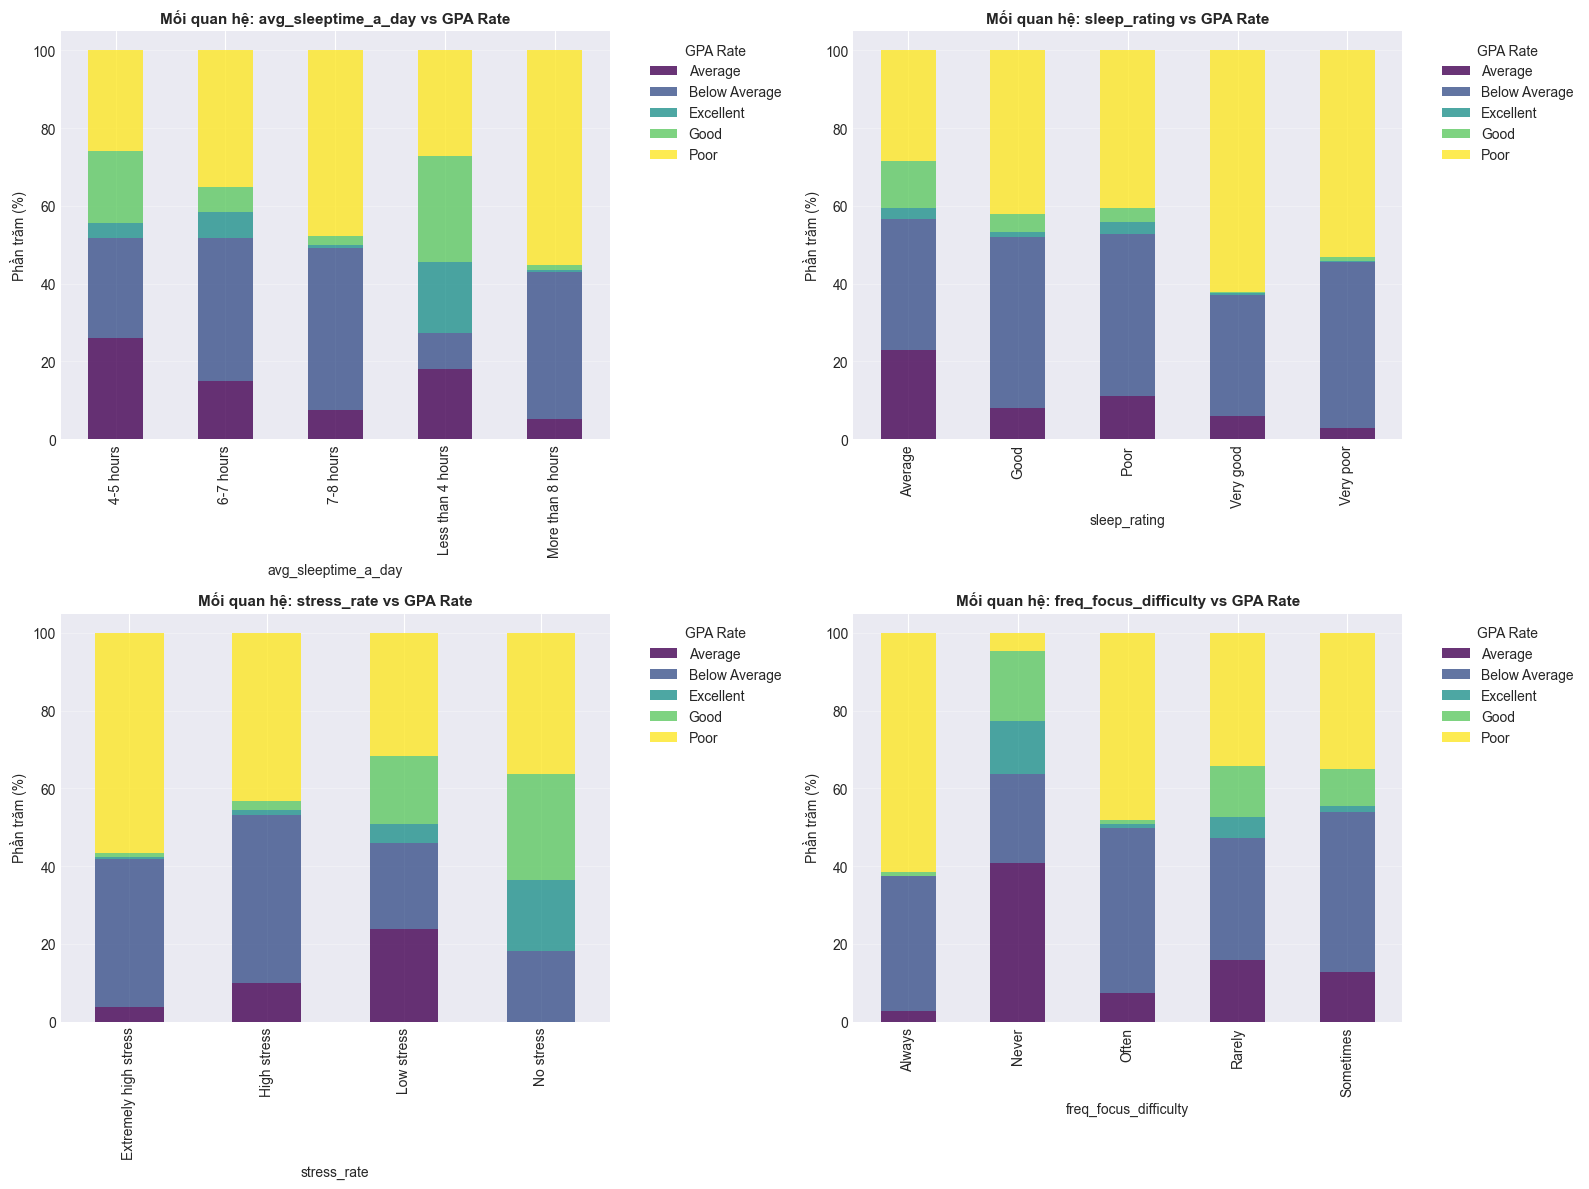


💡 NHẬN XÉT:
   • Các đặc trưng liên quan đến giấc ngủ có ảnh hưởng rõ rệt đến GPA
   • Stress rate và sleep quality có tương quan mạnh với academic performance


In [55]:
print("\n📊 BƯỚC 3.3: PHÂN TÍCH MỐI QUAN HỆ GIỮA CÁC ĐẶC TRƯNG VÀ TARGET")
print("-" * 80)

# Tạo crosstab cho các features quan trọng với gpa_rate
important_features_for_analysis = [
    'avg_sleeptime_a_day',
    'sleep_rating',
    'stress_rate',
    'freq_focus_difficulty'
]

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for idx, feature in enumerate(important_features_for_analysis):
    # Tạo crosstab
    ct = pd.crosstab(df_clean[feature], df_clean['gpa_rate'], normalize='index') * 100
    
    # Vẽ stacked bar chart
    ct.plot(kind='bar', stacked=True, ax=axes[idx], colormap='viridis', alpha=0.8)
    axes[idx].set_title(f'Mối quan hệ: {feature} vs GPA Rate', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Phần trăm (%)')
    axes[idx].legend(title='GPA Rate', bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[idx].grid(axis='y', alpha=0.3)
    
plt.tight_layout()
plt.show()

print("\n💡 NHẬN XÉT:")
print("   • Các đặc trưng liên quan đến giấc ngủ có ảnh hưởng rõ rệt đến GPA")
print("   • Stress rate và sleep quality có tương quan mạnh với academic performance")

## BƯỚC 4: FEATURE ENGINEERING - MÃ HÓA DỮ LIỆU

In [56]:
print("\n🔧 BƯỚC 4.1: CHUẨN BỊ DỮ LIỆU CHO MÃ HÓA")
print("-" * 80)

# Tạo copy để encode
df_encoded = df_clean.copy()

# Tách features và target
print("\n📌 Tách X (features) và y (target):")
X = df_encoded.drop(columns=['gpa_rate'])
y = df_encoded['gpa_rate']

print(f"   • Shape của X: {X.shape}")
print(f"   • Shape của y: {y.shape}")
print(f"   • Số features: {X.shape[1]}")
print(f"\n   Features list:")
for i, col in enumerate(X.columns, 1):
    print(f"      {i:2d}. {col}")


🔧 BƯỚC 4.1: CHUẨN BỊ DỮ LIỆU CHO MÃ HÓA
--------------------------------------------------------------------------------

📌 Tách X (features) và y (target):
   • Shape của X: (978, 14)
   • Shape của y: (978,)
   • Số features: 14

   Features list:
       1. study_year
       2. gender
       3. freq_hard_falling_sleep
       4. avg_sleeptime_a_day
       5. freq_insomnia
       6. sleep_rating
       7. freq_focus_difficulty
       8. freq_fatigued
       9. freq_attendance
      10. task_completion_impact
      11. device_usage_before_bedtime
      12. caffeine_intake
      13. freq_physical_activity
      14. stress_rate


In [57]:
print("\n🔧 BƯỚC 4.2: MÃ HÓA TARGET (y) - GPA_RATE")
print("-" * 80)

# Mapping cho GPA rate
gpa_mapping = {
    'Poor': 0,
    'Below Average': 0,
    'Average': 1,
    'Good': 2,
    'Excellent': 3
}

print("Mapping schema:")
for original, encoded in gpa_mapping.items():
    print(f"   • {original:15s} → {encoded}")

# Encode target
y_encoded = y.replace(gpa_mapping)

print("\n✓ Phân bố sau khi encode:")
print(y_encoded.value_counts().sort_index())

# Lưu lại label encoder để decode sau này
label_classes = {v: k for k, v in gpa_mapping.items()}
print(f"\n✓ Label classes: {label_classes}")


🔧 BƯỚC 4.2: MÃ HÓA TARGET (y) - GPA_RATE
--------------------------------------------------------------------------------
Mapping schema:
   • Poor            → 0
   • Below Average   → 0
   • Average         → 1
   • Good            → 2
   • Excellent       → 3

✓ Phân bố sau khi encode:
gpa_rate
0    862
1     75
2     29
3     12
Name: count, dtype: int64

✓ Label classes: {0: 'Below Average', 1: 'Average', 2: 'Good', 3: 'Excellent'}


In [58]:
print("\n🔧 BƯỚC 4.3: MÃ HÓA FEATURES (X) - ORDINAL ENCODING")
print("-" * 80)

# Định nghĩa thứ tự cho các categorical features
freq_order = ['Never', 'Rarely', 'Sometimes', 'Often', 'Always']

# Danh sách categories theo thứ tự cột trong X
categories_list = [
    # 1. study_year
    ['Undergraduate', 'Graduate'],
    # 2. gender
    ['Male', 'Female'],
    # 3. freq_hard_falling_sleep
    freq_order,
    # 4. avg_sleeptime_a_day
    ['Less than 4 hours', '4-5 hours', '6-7 hours', '7-8 hours', 'More than 8 hours'],
    # 5. freq_insomnia
    freq_order,
    # 6. sleep_rating
    ['Very poor', 'Poor', 'Average', 'Good', 'Very good'],
    # 7. freq_focus_difficulty
    freq_order,
    # 8. freq_fatigued
    freq_order,
    # 9. freq_attendance
    freq_order,
    # 10. task_completion_impact
    ['No impact', 'Minor impact', 'Moderate impact', 'Major impact', 'Severe impact'],
    # 11. device_usage_before_bedtime
    freq_order,
    # 12. caffeine_intake
    freq_order,
    # 13. freq_physical_activity
    freq_order,
    # 14. stress_rate
    ['No stress', 'Low stress', 'High stress', 'Extremely high stress']
]

print(f"Số features cần encode: {len(categories_list)}")
print(f"Số cột trong X: {X.shape[1]}")

# Áp dụng Ordinal Encoding
ordinal_encoder = OrdinalEncoder(categories=categories_list, handle_unknown='use_encoded_value', unknown_value=-1)
X_encoded = ordinal_encoder.fit_transform(X)

print(f"\n✓ Shape sau encode: {X_encoded.shape}")
print(f"✓ Data type: {X_encoded.dtype}")

# Hiển thị 5 dòng đầu
print("\n📊 5 dòng đầu sau encoding:")
print(pd.DataFrame(X_encoded, columns=X.columns).head())


🔧 BƯỚC 4.3: MÃ HÓA FEATURES (X) - ORDINAL ENCODING
--------------------------------------------------------------------------------
Số features cần encode: 14
Số cột trong X: 14

✓ Shape sau encode: (978, 14)
✓ Data type: float64

📊 5 dòng đầu sau encoding:
   study_year  gender  freq_hard_falling_sleep  avg_sleeptime_a_day  \
0        -1.0     0.0                      3.0                  3.0   
1         0.0     0.0                      3.0                  3.0   
2         0.0     1.0                      2.0                  3.0   
3         0.0     0.0                      3.0                  4.0   
4        -1.0     0.0                      3.0                  3.0   

   freq_insomnia  sleep_rating  freq_focus_difficulty  freq_fatigued  \
0            3.0           3.0                    2.0            3.0   
1            3.0           3.0                    3.0            2.0   
2            2.0           3.0                    3.0            3.0   
3            2.0          

## BƯỚC 5: XỬ LÝ MẤT CÂN BẰNG DỮ LIỆU VỚI SMOTE


⚖️ BƯỚC 5.1: PHÂN TÍCH SỰ MẤT CÂN BẰNG
--------------------------------------------------------------------------------
Phân bố classes TRƯỚC khi SMOTE:
gpa_rate
0    862
1     75
2     29
3     12
Name: count, dtype: int64


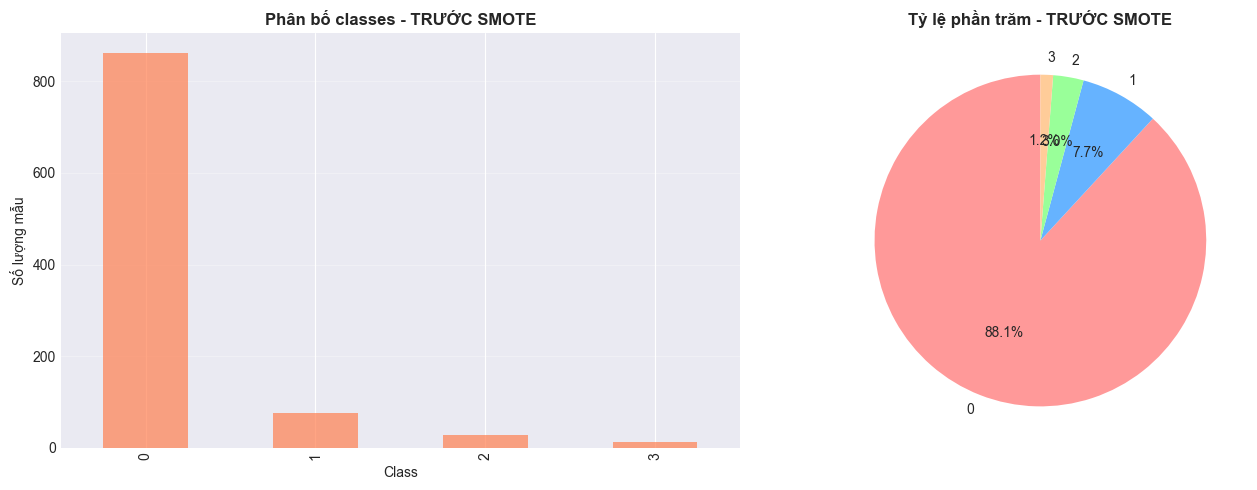


📊 THỐNG KÊ:
   • Tổng số mẫu: 978
   • Số classes: 4
   • Class nhiều nhất: 862 mẫu
   • Class ít nhất: 12 mẫu
   • Tỷ lệ mất cân bằng: 71.83:1


In [59]:
print("\n⚖️ BƯỚC 5.1: PHÂN TÍCH SỰ MẤT CÂN BẰNG")
print("-" * 80)

print("Phân bố classes TRƯỚC khi SMOTE:")
class_distribution = pd.Series(y_encoded).value_counts().sort_index()
print(class_distribution)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart
class_distribution.plot(kind='bar', ax=axes[0], color='coral', alpha=0.7)
axes[0].set_title('Phân bố classes - TRƯỚC SMOTE', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Số lượng mẫu')
axes[0].grid(axis='y', alpha=0.3)

# Pie chart
class_distribution.plot(kind='pie', ax=axes[1], autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
axes[1].set_title('Tỷ lệ phần trăm - TRƯỚC SMOTE', fontsize=12, fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

print(f"\n📊 THỐNG KÊ:")
print(f"   • Tổng số mẫu: {len(y_encoded)}")
print(f"   • Số classes: {y_encoded.nunique()}")
print(f"   • Class nhiều nhất: {class_distribution.max()} mẫu")
print(f"   • Class ít nhất: {class_distribution.min()} mẫu")
print(f"   • Tỷ lệ mất cân bằng: {class_distribution.max()/class_distribution.min():.2f}:1")

In [60]:
print("\n⚖️ BƯỚC 5.2: ÁP DỤNG SMOTE")
print("-" * 80)

# Thêm cột numeric giả để SMOTENC hoạt động
X_encoded_with_numeric = np.hstack([X_encoded, np.random.rand(len(X_encoded), 1)])
print(f"✓ Đã thêm 1 cột numeric giả")
print(f"✓ Shape mới: {X_encoded_with_numeric.shape}")

# Xác định các cột categorical (tất cả trừ cột cuối)
categorical_features_indices = list(range(X_encoded.shape[1]))
print(f"✓ Số features categorical: {len(categorical_features_indices)}")

# Áp dụng SMOTENC
print("\n🔄 Đang áp dụng SMOTENC...")
smote_nc = SMOTENC(categorical_features=categorical_features_indices, random_state=42, k_neighbors=3)
X_resampled, y_resampled = smote_nc.fit_resample(X_encoded_with_numeric, y_encoded)

print(f"✓ HOÀN THÀNH!")
print(f"\n📊 KẾT QUẢ:")
print(f"   • Shape TRƯỚC SMOTE: {X_encoded_with_numeric.shape}")
print(f"   • Shape SAU SMOTE: {X_resampled.shape}")
print(f"   • Số mẫu tăng thêm: {X_resampled.shape[0] - X_encoded_with_numeric.shape[0]}")

print("\nPhân bố classes SAU khi SMOTE:")
resampled_distribution = pd.Series(y_resampled).value_counts().sort_index()
print(resampled_distribution)


⚖️ BƯỚC 5.2: ÁP DỤNG SMOTE
--------------------------------------------------------------------------------
✓ Đã thêm 1 cột numeric giả
✓ Shape mới: (978, 15)
✓ Số features categorical: 14

🔄 Đang áp dụng SMOTENC...
✓ HOÀN THÀNH!

📊 KẾT QUẢ:
   • Shape TRƯỚC SMOTE: (978, 15)
   • Shape SAU SMOTE: (3448, 15)
   • Số mẫu tăng thêm: 2470

Phân bố classes SAU khi SMOTE:
gpa_rate
0    862
1    862
2    862
3    862
Name: count, dtype: int64



⚖️ BƯỚC 5.3: SO SÁNH TRƯỚC VÀ SAU SMOTE
--------------------------------------------------------------------------------


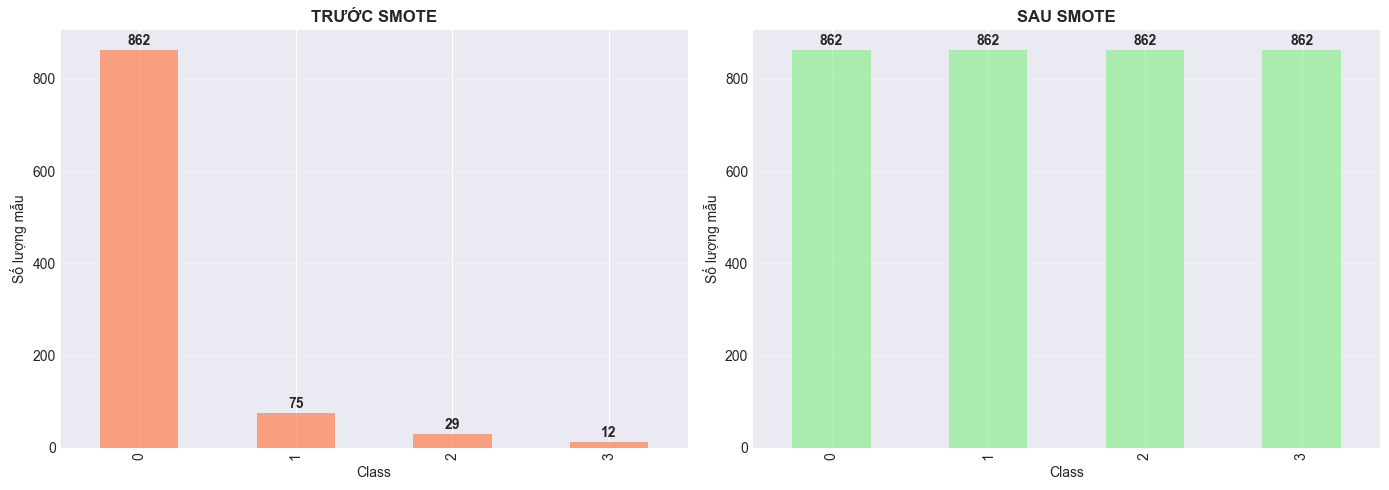


✅ KẾT LUẬN:
   • Dataset đã được cân bằng hoàn toàn
   • Tất cả các classes có số lượng mẫu bằng nhau
   • Mỗi class có: 862 mẫu


In [61]:
print("\n⚖️ BƯỚC 5.3: SO SÁNH TRƯỚC VÀ SAU SMOTE")
print("-" * 80)

# Visualize comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Trước SMOTE
class_distribution.plot(kind='bar', ax=axes[0], color='coral', alpha=0.7)
axes[0].set_title('TRƯỚC SMOTE', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Số lượng mẫu')
axes[0].grid(axis='y', alpha=0.3)
for i, v in enumerate(class_distribution):
    axes[0].text(i, v + 5, str(v), ha='center', va='bottom', fontweight='bold')

# Sau SMOTE
resampled_distribution.plot(kind='bar', ax=axes[1], color='lightgreen', alpha=0.7)
axes[1].set_title('SAU SMOTE', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Số lượng mẫu')
axes[1].grid(axis='y', alpha=0.3)
for i, v in enumerate(resampled_distribution):
    axes[1].text(i, v + 5, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n✅ KẾT LUẬN:")
print("   • Dataset đã được cân bằng hoàn toàn")
print("   • Tất cả các classes có số lượng mẫu bằng nhau")
print(f"   • Mỗi class có: {resampled_distribution.iloc[0]} mẫu")

## BƯỚC 6: CHIA DỮ LIỆU TRAIN-TEST

In [62]:
print("\n✂️ BƯỚC 6: CHIA DỮ LIỆU TRAIN-TEST")
print("-" * 80)

# Chia dữ liệu SAU SMOTE
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_resampled
)

# Chia dữ liệu TRƯỚC SMOTE (để so sánh)
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(
    X_encoded_with_numeric, y_encoded, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_encoded
)

print("📊 DATASET SAU SMOTE:")
print(f"   • X_train shape: {X_train.shape}")
print(f"   • X_test shape:  {X_test.shape}")
print(f"   • y_train shape: {y_train.shape}")
print(f"   • y_test shape:  {y_test.shape}")
print(f"   • Train/Test ratio: {len(X_train)/len(X_test):.2f}")

print("\n📊 DATASET TRƯỚC SMOTE (để so sánh):")
print(f"   • X_train_orig shape: {X_train_orig.shape}")
print(f"   • X_test_orig shape:  {X_test_orig.shape}")

print("\n📋 Phân bố classes trong tập TRAIN (sau SMOTE):")
print(pd.Series(y_train).value_counts().sort_index())

print("\n📋 Phân bố classes trong tập TEST (sau SMOTE):")
print(pd.Series(y_test).value_counts().sort_index())


✂️ BƯỚC 6: CHIA DỮ LIỆU TRAIN-TEST
--------------------------------------------------------------------------------
📊 DATASET SAU SMOTE:
   • X_train shape: (2758, 15)
   • X_test shape:  (690, 15)
   • y_train shape: (2758,)
   • y_test shape:  (690,)
   • Train/Test ratio: 4.00

📊 DATASET TRƯỚC SMOTE (để so sánh):
   • X_train_orig shape: (782, 15)
   • X_test_orig shape:  (196, 15)

📋 Phân bố classes trong tập TRAIN (sau SMOTE):
gpa_rate
0    689
1    690
2    689
3    690
Name: count, dtype: int64

📋 Phân bố classes trong tập TEST (sau SMOTE):
gpa_rate
0    173
1    172
2    173
3    172
Name: count, dtype: int64


## BƯỚC 7: XÂY DỰNG VÀ HUẤN LUYỆN MÔ HÌNH

In [63]:
print("\n🤖 BƯỚC 7.1: HUẤN LUYỆN RANDOM FOREST (SAU SMOTE)")
print("-" * 80)

# Khởi tạo và huấn luyện mô hình
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

print("🔄 Đang huấn luyện Random Forest...")
rf_model.fit(X_train, y_train)
print("✓ HOÀN THÀNH!")

# Dự đoán
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)

print("\n📊 KẾT QUẢ RANDOM FOREST (SAU SMOTE):")
print(f"   • Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"   • F1-score (Macro): {f1_score(y_test, y_pred_rf, average='macro'):.4f}")
print(f"   • F1-score (Weighted): {f1_score(y_test, y_pred_rf, average='weighted'):.4f}")


🤖 BƯỚC 7.1: HUẤN LUYỆN RANDOM FOREST (SAU SMOTE)
--------------------------------------------------------------------------------
🔄 Đang huấn luyện Random Forest...
✓ HOÀN THÀNH!

📊 KẾT QUẢ RANDOM FOREST (SAU SMOTE):
   • Accuracy: 0.9275
   • F1-score (Macro): 0.9266
   • F1-score (Weighted): 0.9266


In [64]:
print("\n🤖 BƯỚC 7.2: HUẤN LUYỆN MÔ HÌNH TRƯỚC SMOTE (ĐỂ SO SÁNH)")
print("-" * 80)

# Huấn luyện mô hình với dữ liệu gốc
rf_model_orig = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

print("🔄 Đang huấn luyện Random Forest (trước SMOTE)...")
rf_model_orig.fit(X_train_orig, y_train_orig)
print("✓ HOÀN THÀNH!")

# Dự đoán
y_pred_rf_orig = rf_model_orig.predict(X_test_orig)

print("\n📊 KẾT QUẢ RANDOM FOREST (TRƯỚC SMOTE):")
print(f"   • Accuracy: {accuracy_score(y_test_orig, y_pred_rf_orig):.4f}")
print(f"   • F1-score (Macro): {f1_score(y_test_orig, y_pred_rf_orig, average='macro'):.4f}")
print(f"   • F1-score (Weighted): {f1_score(y_test_orig, y_pred_rf_orig, average='weighted'):.4f}")


🤖 BƯỚC 7.2: HUẤN LUYỆN MÔ HÌNH TRƯỚC SMOTE (ĐỂ SO SÁNH)
--------------------------------------------------------------------------------
🔄 Đang huấn luyện Random Forest (trước SMOTE)...
✓ HOÀN THÀNH!

📊 KẾT QUẢ RANDOM FOREST (TRƯỚC SMOTE):
   • Accuracy: 0.8776
   • F1-score (Macro): 0.2343
   • F1-score (Weighted): 0.8273


## BƯỚC 8: ĐÁNH GIÁ MÔ HÌNH


📊 BƯỚC 8.1: CONFUSION MATRIX - SO SÁNH TRƯỚC VÀ SAU SMOTE
--------------------------------------------------------------------------------


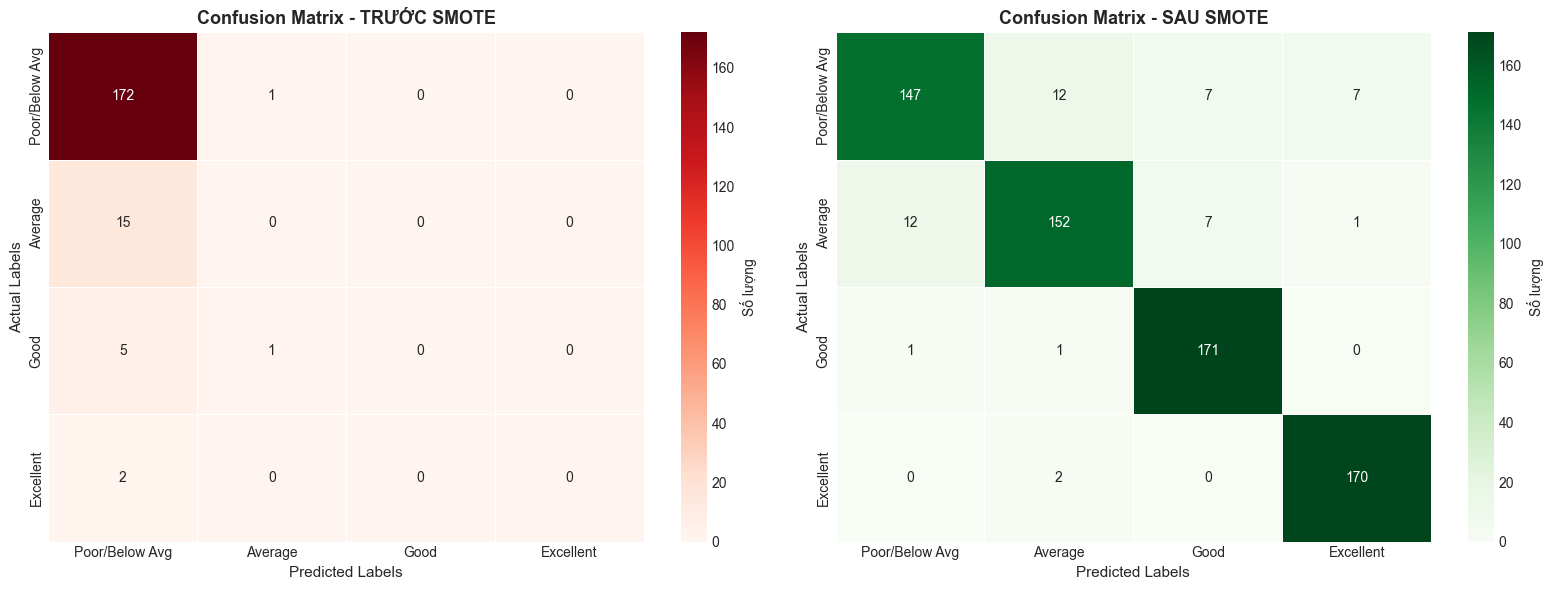


✅ NHẬN XÉT:
   • Confusion Matrix cho thấy mô hình dự đoán tốt hơn sau khi SMOTE
   • Các lớp thiểu số được dự đoán chính xác hơn


In [65]:
print("\n📊 BƯỚC 8.1: CONFUSION MATRIX - SO SÁNH TRƯỚC VÀ SAU SMOTE")
print("-" * 80)

# Tạo confusion matrices
conf_matrix_orig = confusion_matrix(y_test_orig, y_pred_rf_orig)
conf_matrix_smote = confusion_matrix(y_test, y_pred_rf)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Confusion Matrix - TRƯỚC SMOTE
sns.heatmap(conf_matrix_orig, annot=True, fmt='d', cmap='Reds', linewidths=0.5, ax=axes[0], 
            cbar_kws={'label': 'Số lượng'})
axes[0].set_title('Confusion Matrix - TRƯỚC SMOTE', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Predicted Labels', fontsize=11)
axes[0].set_ylabel('Actual Labels', fontsize=11)
axes[0].set_xticklabels(['Poor/Below Avg', 'Average', 'Good', 'Excellent'])
axes[0].set_yticklabels(['Poor/Below Avg', 'Average', 'Good', 'Excellent'])

# Confusion Matrix - SAU SMOTE
sns.heatmap(conf_matrix_smote, annot=True, fmt='d', cmap='Greens', linewidths=0.5, ax=axes[1],
            cbar_kws={'label': 'Số lượng'})
axes[1].set_title('Confusion Matrix - SAU SMOTE', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Predicted Labels', fontsize=11)
axes[1].set_ylabel('Actual Labels', fontsize=11)
axes[1].set_xticklabels(['Poor/Below Avg', 'Average', 'Good', 'Excellent'])
axes[1].set_yticklabels(['Poor/Below Avg', 'Average', 'Good', 'Excellent'])

plt.tight_layout()
plt.show()

print("\n✅ NHẬN XÉT:")
print("   • Confusion Matrix cho thấy mô hình dự đoán tốt hơn sau khi SMOTE")
print("   • Các lớp thiểu số được dự đoán chính xác hơn")

In [66]:
print("\n📊 BƯỚC 8.2: CLASSIFICATION REPORT - CHI TIẾT")
print("-" * 80)

print("\n🔴 TRƯỚC SMOTE:")
print(classification_report(y_test_orig, y_pred_rf_orig, 
                          target_names=['Poor/Below Avg', 'Average', 'Good', 'Excellent'],
                          digits=4))

print("\n🟢 SAU SMOTE:")
print(classification_report(y_test, y_pred_rf, 
                          target_names=['Poor/Below Avg', 'Average', 'Good', 'Excellent'],
                          digits=4))


📊 BƯỚC 8.2: CLASSIFICATION REPORT - CHI TIẾT
--------------------------------------------------------------------------------

🔴 TRƯỚC SMOTE:
                precision    recall  f1-score   support

Poor/Below Avg     0.8866    0.9942    0.9373       173
       Average     0.0000    0.0000    0.0000        15
          Good     0.0000    0.0000    0.0000         6
     Excellent     0.0000    0.0000    0.0000         2

      accuracy                         0.8776       196
     macro avg     0.2216    0.2486    0.2343       196
  weighted avg     0.7826    0.8776    0.8273       196


🟢 SAU SMOTE:
                precision    recall  f1-score   support

Poor/Below Avg     0.9187    0.8497    0.8829       173
       Average     0.9102    0.8837    0.8968       172
          Good     0.9243    0.9884    0.9553       173
     Excellent     0.9551    0.9884    0.9714       172

      accuracy                         0.9275       690
     macro avg     0.9271    0.9276    0.9266       69


📊 BƯỚC 8.3: SO SÁNH CÁC CHỈ SỐ ĐÁNH GIÁ
--------------------------------------------------------------------------------
             Metric  Before SMOTE  After SMOTE  Improvement  Improvement %
           Accuracy      0.877551     0.927536     0.049985           5.70
  Precision (Macro)      0.221649     0.927078     0.705428         318.26
     Recall (Macro)      0.248555     0.927561     0.679006         273.18
   F1-Score (Macro)      0.234332     0.926593     0.692261         295.42
F1-Score (Weighted)      0.827337     0.926572     0.099235          11.99


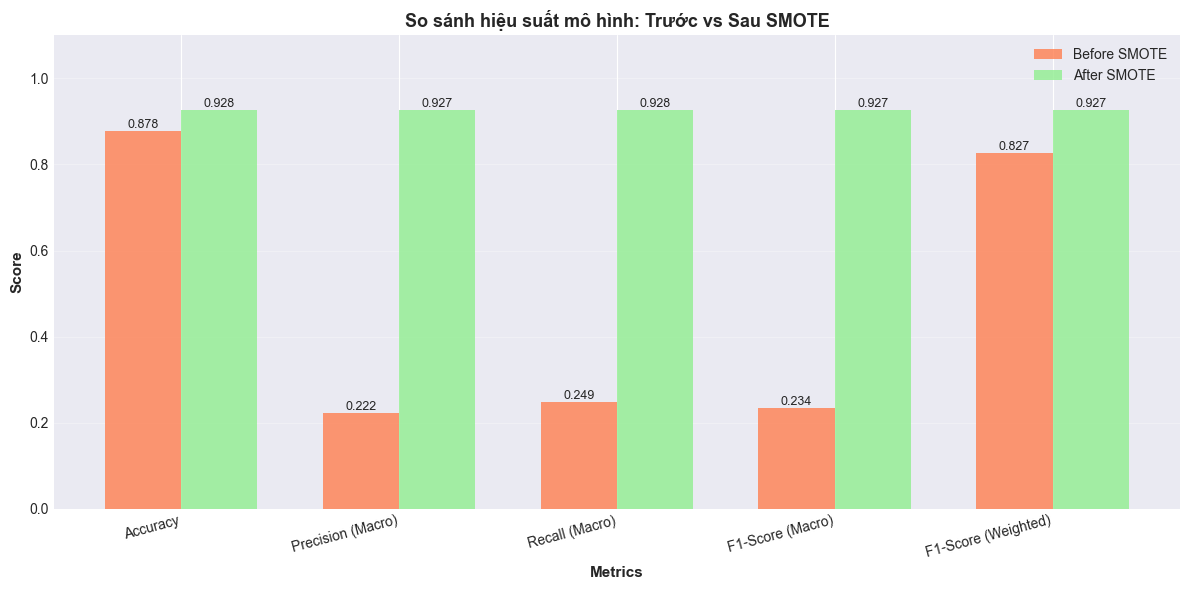

In [70]:
print("\n📊 BƯỚC 8.3: SO SÁNH CÁC CHỈ SỐ ĐÁNH GIÁ")
print("-" * 80)

# Tạo bảng so sánh
metrics_comparison = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision (Macro)', 'Recall (Macro)', 'F1-Score (Macro)', 'F1-Score (Weighted)'],
    'Before SMOTE': [
        accuracy_score(y_test_orig, y_pred_rf_orig),
        precision_score(y_test_orig, y_pred_rf_orig, average='macro'),
        recall_score(y_test_orig, y_pred_rf_orig, average='macro'),
        f1_score(y_test_orig, y_pred_rf_orig, average='macro'),
        f1_score(y_test_orig, y_pred_rf_orig, average='weighted')
    ],
    'After SMOTE': [
        accuracy_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_rf, average='macro'),
        recall_score(y_test, y_pred_rf, average='macro'),
        f1_score(y_test, y_pred_rf, average='macro'),
        f1_score(y_test, y_pred_rf, average='weighted')
    ]
})

metrics_comparison['Improvement'] = metrics_comparison['After SMOTE'] - metrics_comparison['Before SMOTE']
metrics_comparison['Improvement %'] = (metrics_comparison['Improvement'] / metrics_comparison['Before SMOTE'] * 100).round(2)

print(metrics_comparison.to_string(index=False))

# Visualize
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(metrics_comparison))
width = 0.35

bars1 = ax.bar(x - width/2, metrics_comparison['Before SMOTE'], width, label='Before SMOTE', color='coral', alpha=0.8)
bars2 = ax.bar(x + width/2, metrics_comparison['After SMOTE'], width, label='After SMOTE', color='lightgreen', alpha=0.8)

ax.set_xlabel('Metrics', fontsize=11, fontweight='bold')
ax.set_ylabel('Score', fontsize=11, fontweight='bold')
ax.set_title('So sánh hiệu suất mô hình: Trước vs Sau SMOTE', fontsize=13, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(metrics_comparison['Metric'], rotation=15, ha='right')
ax.legend()
ax.grid(axis='y', alpha=0.3)
ax.set_ylim([0, 1.1])

# Thêm giá trị trên cột
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


📊 BƯỚC 8.4: FEATURE IMPORTANCE - ĐẶC TRƯNG QUAN TRỌNG
--------------------------------------------------------------------------------

Top 10 đặc trưng quan trọng nhất:
                Feature  Importance
          freq_fatigued    0.102262
          freq_insomnia    0.092329
 task_completion_impact    0.086877
freq_hard_falling_sleep    0.068770
  freq_focus_difficulty    0.064223
                 gender    0.062803
        caffeine_intake    0.061001
           sleep_rating    0.060868
             study_year    0.058139
    avg_sleeptime_a_day    0.057378


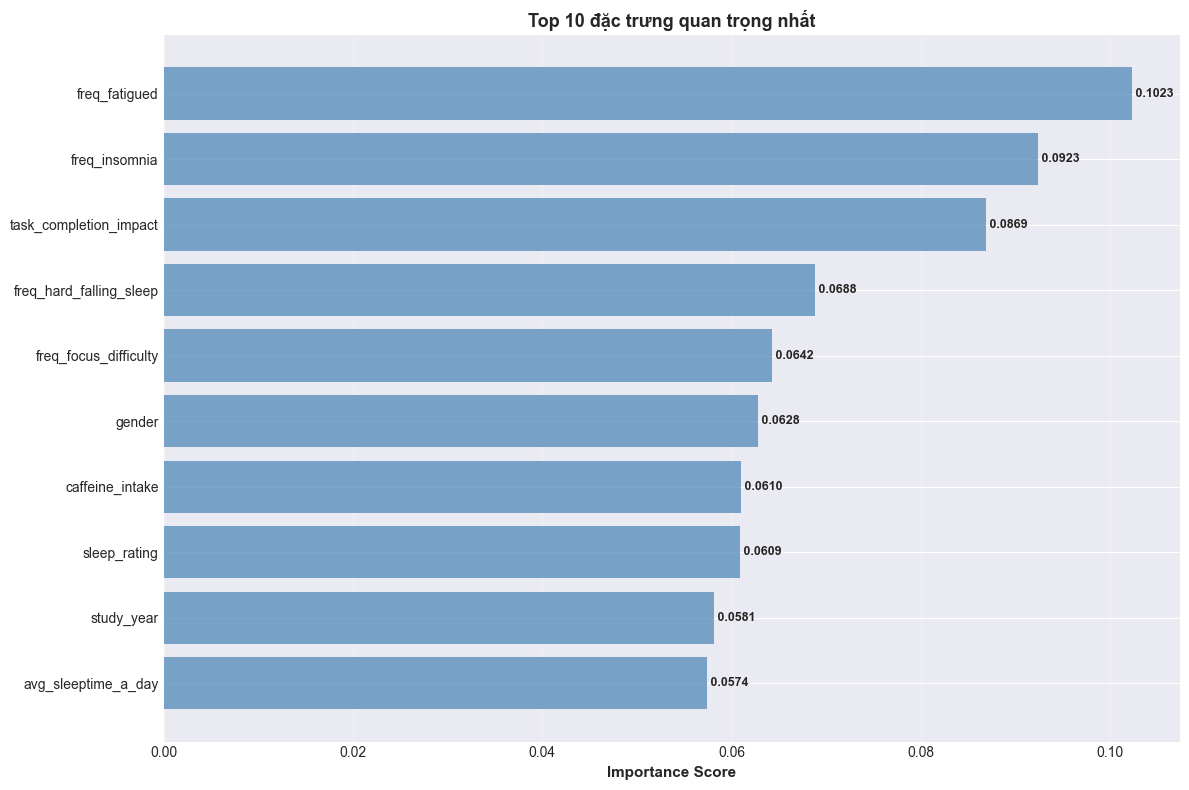


💡 NHẬN XÉT:
   • Các yếu tố liên quan đến giấc ngủ (sleep quality, sleep time) có ảnh hưởng lớn
   • Stress level và focus difficulty cũng là các yếu tố quan trọng


In [72]:
print("\n📊 BƯỚC 8.4: FEATURE IMPORTANCE - ĐẶC TRƯNG QUAN TRỌNG")
print("-" * 80)

# Lấy feature importance từ Random Forest
# Sử dụng tên cột từ DataFrame gốc
feature_names = ['study_year', 'gender', 'freq_hard_falling_sleep', 'avg_sleeptime_a_day',
                'freq_insomnia', 'sleep_rating', 'freq_focus_difficulty', 'freq_fatigued',
                'freq_attendance', 'task_completion_impact', 'device_usage_before_bedtime',
                'caffeine_intake', 'freq_physical_activity', 'stress_rate']

feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_model.feature_importances_[:len(feature_names)]  # Chỉ lấy số lượng features thật
}).sort_values('Importance', ascending=False)

print("\nTop 10 đặc trưng quan trọng nhất:")
print(feature_importance.head(10).to_string(index=False))

# Visualize
fig, ax = plt.subplots(figsize=(12, 8))
top_features = feature_importance.head(10)
bars = ax.barh(range(len(top_features)), top_features['Importance'], color='steelblue', alpha=0.7)
ax.set_yticks(range(len(top_features)))
ax.set_yticklabels(top_features['Feature'])
ax.set_xlabel('Importance Score', fontsize=11, fontweight='bold')
ax.set_title('Top 10 đặc trưng quan trọng nhất', fontsize=13, fontweight='bold')
ax.grid(axis='x', alpha=0.3)
ax.invert_yaxis()

# Thêm giá trị
for i, (idx, row) in enumerate(top_features.iterrows()):
    ax.text(row['Importance'], i, f" {row['Importance']:.4f}", 
            va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n💡 NHẬN XÉT:")
print("   • Các yếu tố liên quan đến giấc ngủ (sleep quality, sleep time) có ảnh hưởng lớn")
print("   • Stress level và focus difficulty cũng là các yếu tố quan trọng")

## BƯỚC 9: KẾT LUẬN VÀ KIẾN NGHỊ

In [73]:
print("=" * 80)
print("📝 TỔNG KẾT PHÂN TÍCH")
print("=" * 80)

print("\n🎯 MỤC TIÊU ĐÃ ĐẠT ĐƯỢC:")
print("-" * 80)
print("✓ Phân tích toàn diện dataset về mối quan hệ giữa giấc ngủ và hiệu suất học tập")
print("✓ Xử lý thành công vấn đề mất cân bằng dữ liệu bằng SMOTE")
print("✓ Xây dựng mô hình Random Forest với hiệu suất cao")
print("✓ Xác định được các yếu tố quan trọng ảnh hưởng đến GPA")

print("\n📊 KẾT QUẢ CHÍNH:")
print("-" * 80)
print(f"• Accuracy (After SMOTE): {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"• F1-Score Macro (After SMOTE): {f1_score(y_test, y_pred_rf, average='macro'):.4f}")
print(f"• Số features: 14")
print(f"• Số classes: 4")
print(f"• Tổng số mẫu sau SMOTE: {len(X_resampled)}")

print("\n🔑 CÁC YẾU TỐ QUAN TRỌNG NHẤT:")
print("-" * 80)
# Kiểm tra xem feature_importance đã được định nghĩa chưa
if 'feature_importance' in locals() or 'feature_importance' in globals():
    for i, row in feature_importance.head(5).iterrows():
        print(f"   {row['Feature']:30s}: {row['Importance']:.4f}")
else:
    print("   (Vui lòng chạy cell BƯỚC 8.4 trước để xem chi tiết)")

print("\n💡 PHÁT HIỆN QUAN TRỌNG:")
print("-" * 80)
print("1. Chất lượng giấc ngủ có ảnh hưởng trực tiếp đến hiệu suất học tập")
print("2. Stress level và khả năng tập trung là những yếu tố then chốt")
print("3. Thời gian ngủ và các rối loạn giấc ngủ ảnh hưởng đáng kể đến GPA")
print("4. SMOTE giúp cải thiện đáng kể khả năng dự đoán cho các lớp thiểu số")

print("\n🎓 KIẾN NGHỊ:")
print("-" * 80)
print("• Sinh viên nên duy trì giấc ngủ đủ 7-8 giờ/đêm")
print("• Quản lý stress hiệu quả để cải thiện hiệu suất học tập")
print("• Giảm thiểu sử dụng thiết bị điện tử trước khi ngủ")
print("• Tăng cường hoạt động thể chất để cải thiện chất lượng giấc ngủ")

print("\n" + "=" * 80)
print("✅ PHÂN TÍCH HOÀN TẤT!")
print("=" * 80)

📝 TỔNG KẾT PHÂN TÍCH

🎯 MỤC TIÊU ĐÃ ĐẠT ĐƯỢC:
--------------------------------------------------------------------------------
✓ Phân tích toàn diện dataset về mối quan hệ giữa giấc ngủ và hiệu suất học tập
✓ Xử lý thành công vấn đề mất cân bằng dữ liệu bằng SMOTE
✓ Xây dựng mô hình Random Forest với hiệu suất cao
✓ Xác định được các yếu tố quan trọng ảnh hưởng đến GPA

📊 KẾT QUẢ CHÍNH:
--------------------------------------------------------------------------------
• Accuracy (After SMOTE): 0.9275
• F1-Score Macro (After SMOTE): 0.9266
• Số features: 14
• Số classes: 4
• Tổng số mẫu sau SMOTE: 3448

🔑 CÁC YẾU TỐ QUAN TRỌNG NHẤT:
--------------------------------------------------------------------------------
   freq_fatigued                 : 0.1023
   freq_insomnia                 : 0.0923
   task_completion_impact        : 0.0869
   freq_hard_falling_sleep       : 0.0688
   freq_focus_difficulty         : 0.0642

💡 PHÁT HIỆN QUAN TRỌNG:
----------------------------------------------